In [1]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt

In [2]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X,Y = ml.shuffleData(X,Y) # reorder randomly (important later)
X,_ = ml.rescale(X) # works much better on rescaled data
XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2

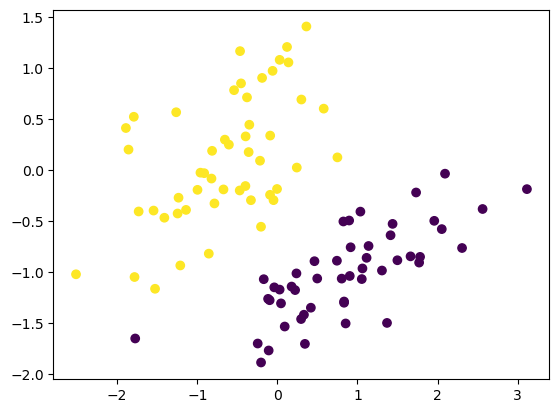

In [3]:
plt.scatter(XA[:,0],XA[:,1],c=YA)

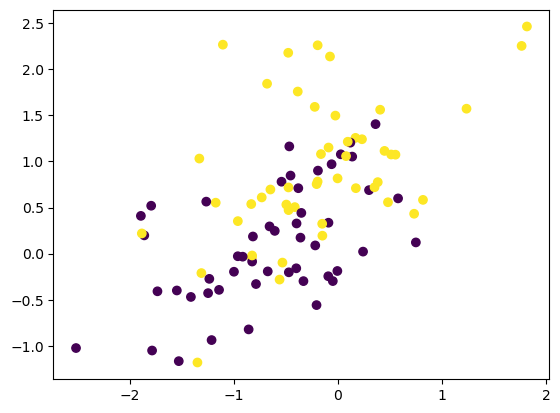

In [4]:
plt.scatter(XB[:,0],XB[:,1],c=YB)

In [5]:
from logisticClassify2 import *
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([0.5,-0.25,1.0]); # TODO: fill in values
learner.theta = wts; # set the learner’s parameters

In [ ]:
    def cal_boundary(self,x1):
        return (-self.theta[0]-self.theta[1]*x1)/self.theta[2]
    def plotBoundary(self,X,Y):
        """ Plot the (linear) decision boundary of the classifier, along with data """
        if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
        ax = X.min(0),X.max(0); ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]);
        ## TODO: find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
        x1b = np.array([ax[0],ax[1]]) # at X1 = points in x1b

        x2b = np.array([self.cal_boundary(ax[0]),self.cal_boundary(ax[1])])   # TODO find x2 values as a function of x1's values
        A = Y==self.classes[0]; # and plot it:
        plt.plot(X[A,0],X[A,1],'b.',X[~A,0],X[~A,1],'r.',x1b,x2b,'k-'); plt.axis(ax); plt.draw();

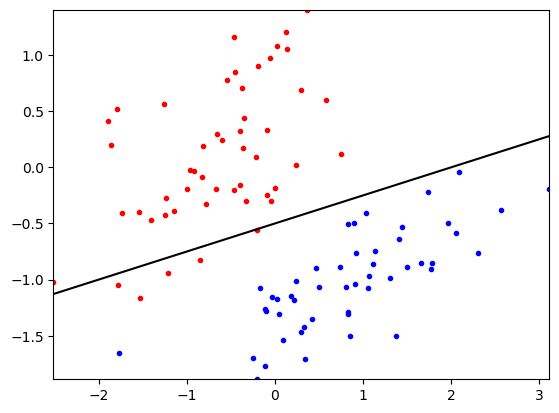

In [6]:
learner.plotBoundary(XA,YA)

In [ ]:
    def predict(self, X):
        """ Return the predictied class of each data point in X"""
        XX = np.hstack((np.ones((X.shape[0], 1)), X))
        R = np.matmul(XX,self.theta)
        Z = np.sign(R)
        Yhat = np.vectorize(self.get_class)(Z)
        return Yhat
    def get_class(self,z):
        if z > 0:
            return self.classes[1]
        else:
            return self.classes[0]

In [7]:
e = learner.err(XA,YA)
print(e)
learner2 = logisticClassify2()
learner2.classes = np.unique(YB) # define class labels using YA or YB
learner2.theta = wts
e = learner2.err(XB,YB)
print(e)

0.050505050505050504
0.46464646464646464


c:\mcsuci\273P\homework\Assignment 3\Assignment 3\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )


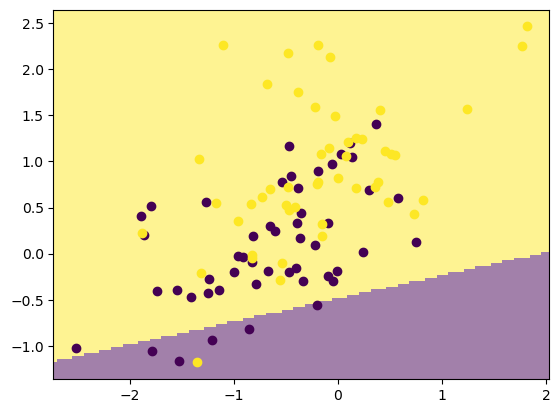

In [8]:
ml.plotClassify2D(learner2, XB, YB)

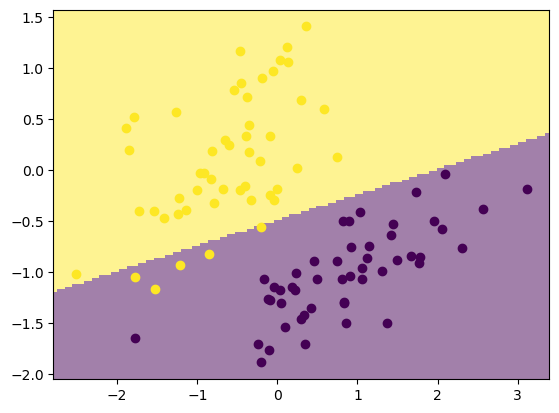

In [9]:
ml.plotClassify2D(learner, XA, YA)

The gradient equations:

$$\frac{\partial J_{j}(\theta)}{\partial \theta_{0}}=-y^{(j)}\left(1-\sigma\left(x^{(j)}\cdot\theta^{T}\right)\right)x_{0}^{(j)}-(1-y^{(j)})\left(-\sigma\left(x^{(j)}\cdot\theta^{T}\right)\right)x_{0}^{(j)}=\left(\sigma\left(x^{(j)}\cdot\theta^{T}\right)-y^{(j)}\right)x_{0}^{(j)}$$

$$\frac{\partial J_{j}(\theta)}{\partial \theta_{1}}=\left(\sigma\left(x^{(j)}\cdot\theta^{T}\right)-y^{(j)}\right)x_{1}^{(j)}$$
$$\frac{\partial J_{j}(\theta)}{\partial \theta_{2}}=\left(\sigma\left(x^{(j)}\cdot\theta^{T}\right)-y^{(j)}\right)x_{2}^{(j)}$$

In [ ]:
    def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];

        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            loss = 0
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri  = np.matmul(XX[i,:],self.theta)     # TODO: compute linear response r(x)
                sigmoid = 1/(1+np.exp(-ri))
                gradi = (sigmoid-YY[i])*(XX[i,:])    # TODO: compute gradient of NLL loss
                self.theta -= stepsize * gradi;  # take a gradient step
                jsur = (-YY[i])*np.log(sigmoid)-(1-YY[i])*np.log(1-sigmoid)
                loss = loss+jsur

            J01.append( self.err(X,Y) )  # evaluate the current error rate

            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
            Jnll.append( loss ) # TODO evaluate the current NLL loss

            plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
            if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
            plt.pause(.01);                    # let OS draw the plot

            print(self.theta,"=>",Jnll[-1],'/',J01[-1])
            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            done = epoch > stopEpochs
            #input("continue:")
            if epoch >3:
                done = done or abs(Jnll[-2]-Jnll[-1]) <stopTol
        return Jnll,J01

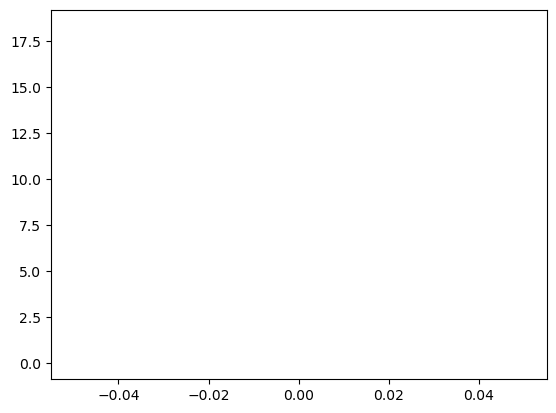

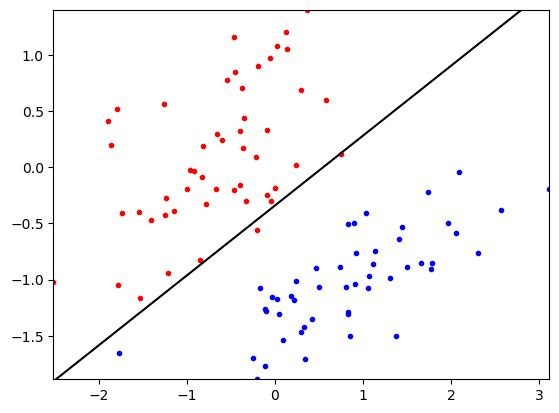

[ 1.12429692 -2.05878966  3.30576157] => 18.315501542200877 / 0.020202020202020204


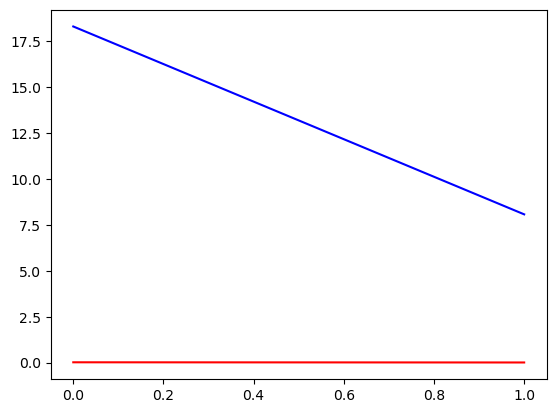

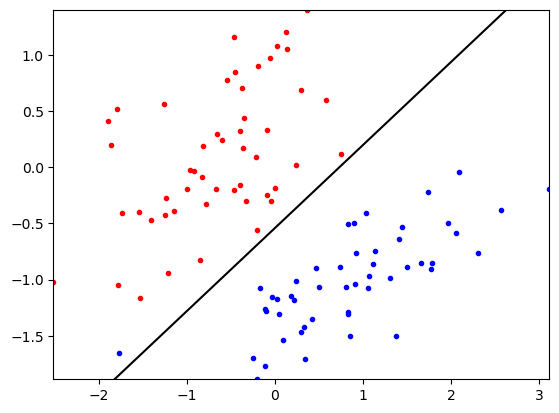

[ 1.94749415 -2.66748972  3.60446578] => 8.080174507668255 / 0.010101010101010102


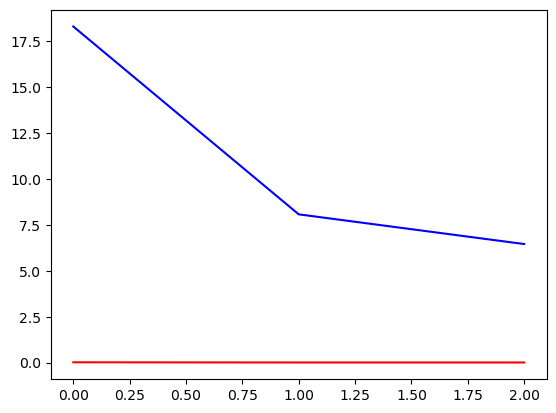

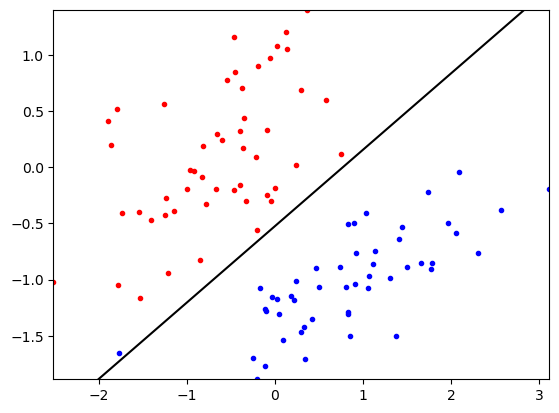

[ 2.11458997 -2.74928233  4.03855919] => 6.462509643603509 / 0.010101010101010102


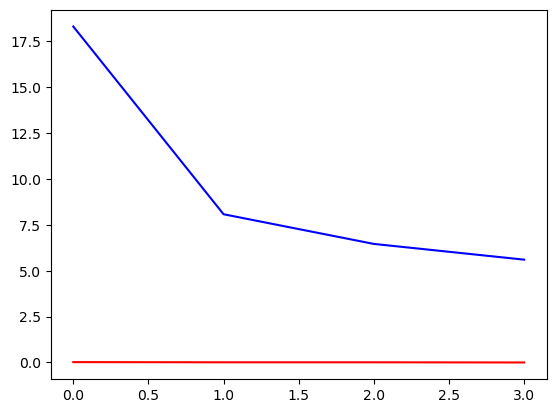

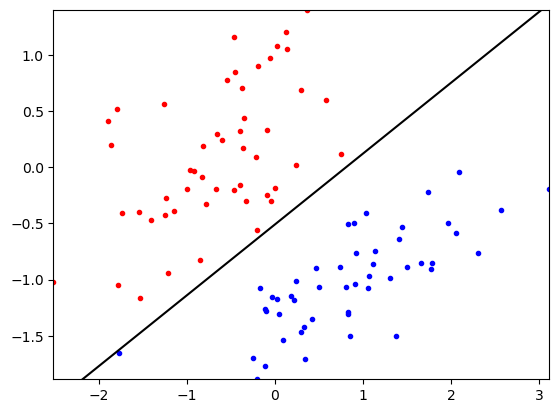

[ 2.21966325 -2.7564813   4.36501713] => 5.605026440142472 / 0.0


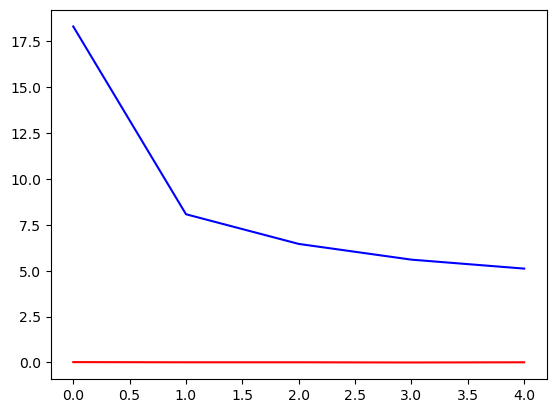

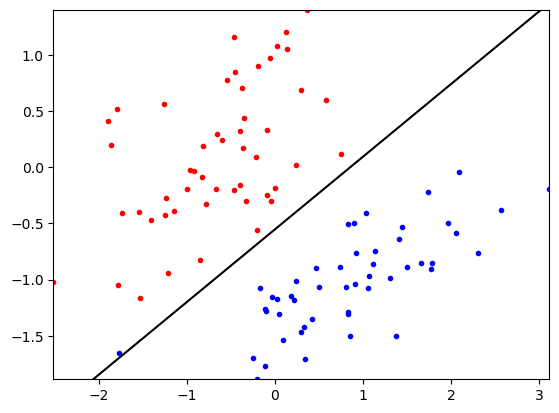

[ 2.46056315 -2.88533669  4.45592872] => 5.117166436148067 / 0.010101010101010102


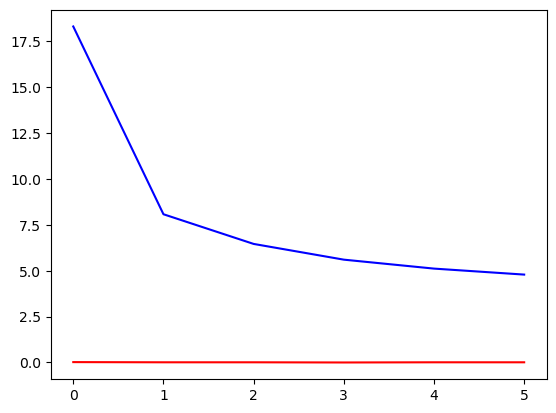

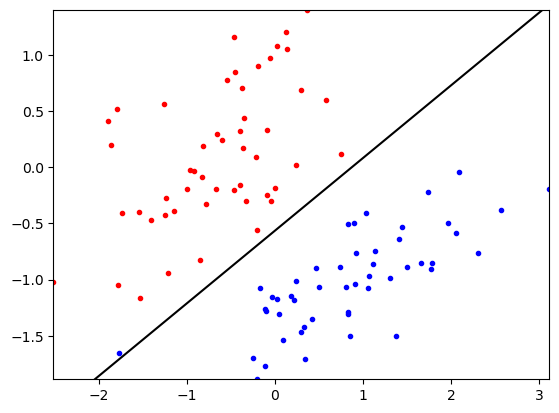

[ 2.58370974 -2.96623537  4.58079366] => 4.79081751921861 / 0.010101010101010102


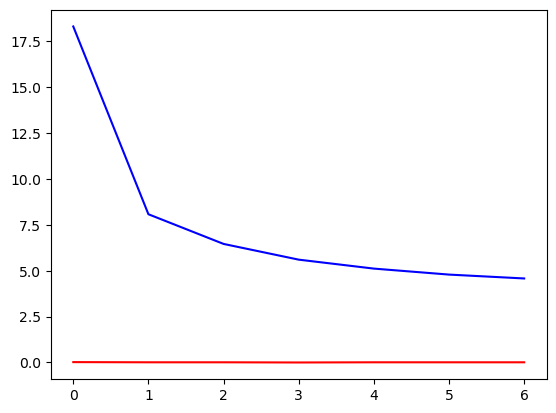

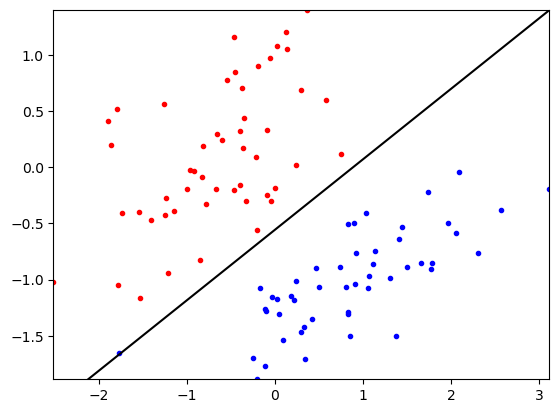

[ 2.63404719 -2.97562383  4.73693715] => 4.579756496405931 / 0.010101010101010102


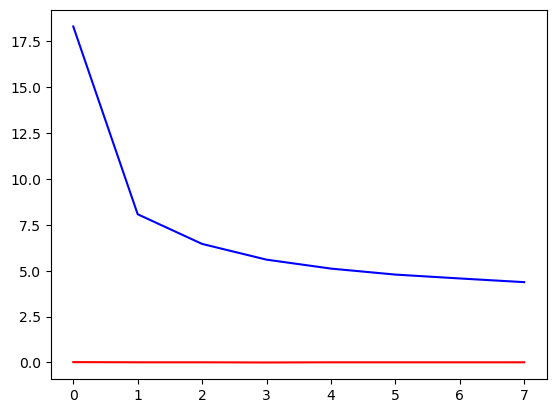

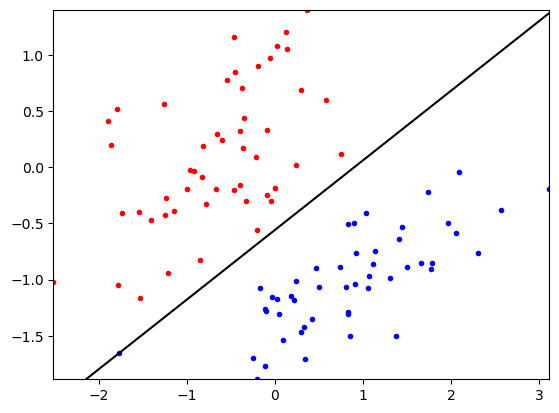

[ 2.70072391 -3.00583601  4.84453912] => 4.378621483366678 / 0.010101010101010102


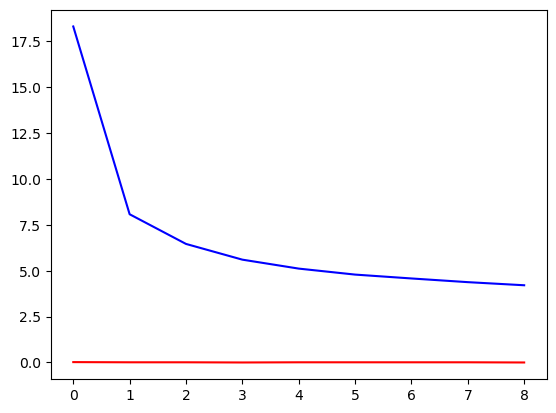

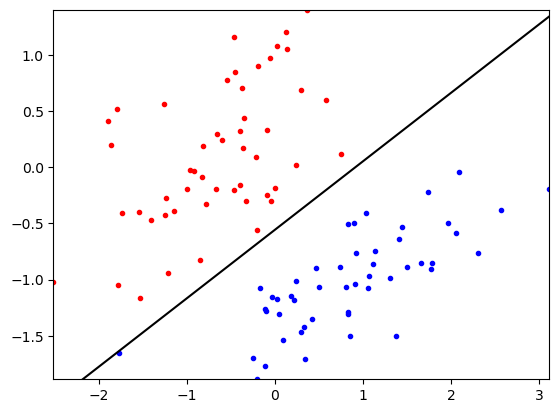

[ 2.75059684 -3.01962029  4.94712879] => 4.209359761771247 / 0.0


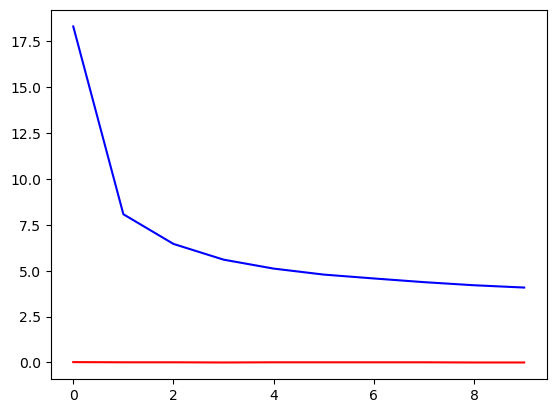

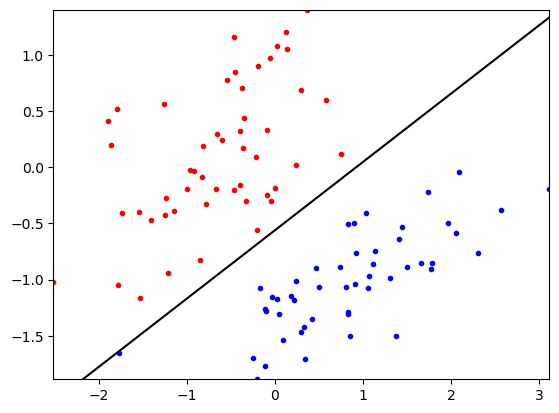

[ 2.81102214 -3.05485306  5.01719852] => 4.08423975601105 / 0.0


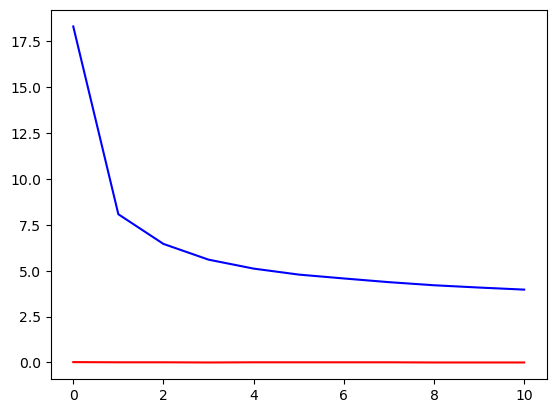

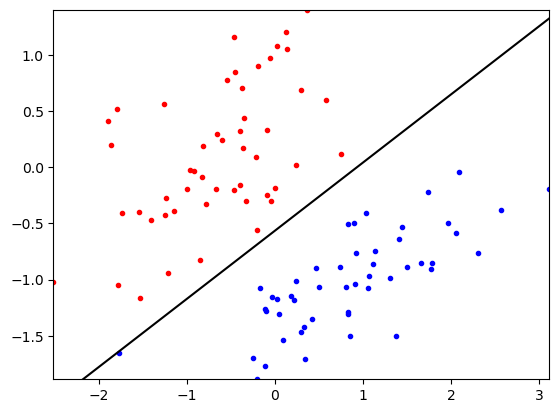

[ 2.86566156 -3.08500016  5.07900155] => 3.9719649020961754 / 0.0


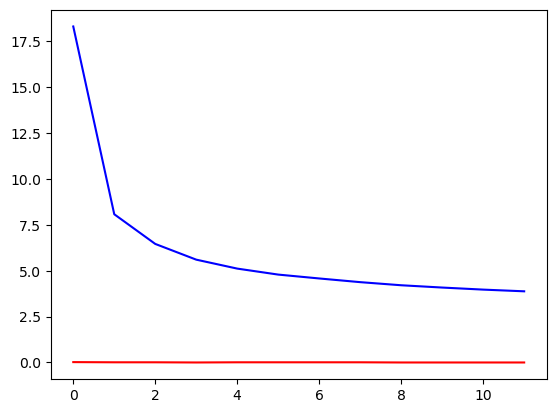

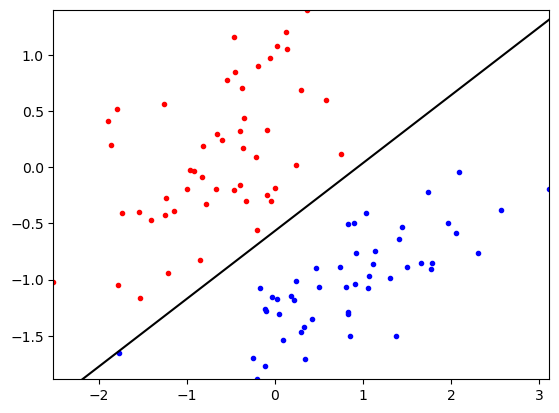

[ 2.90911387 -3.1079313   5.13927525] => 3.8794361903525285 / 0.0


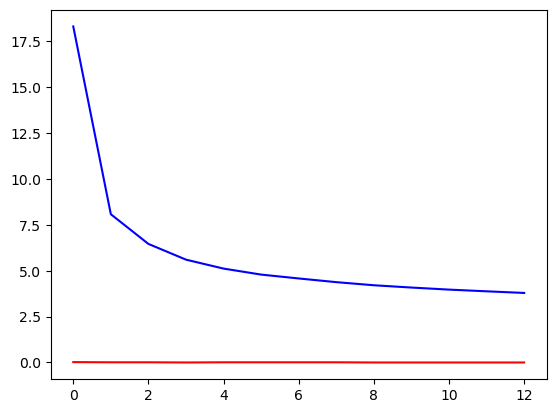

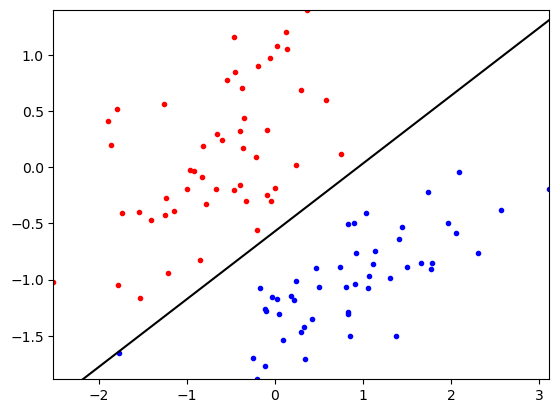

[ 2.95475541 -3.13566679  5.18740265] => 3.7900225443284286 / 0.0


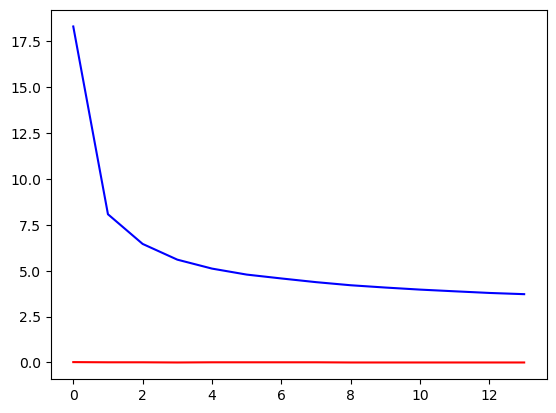

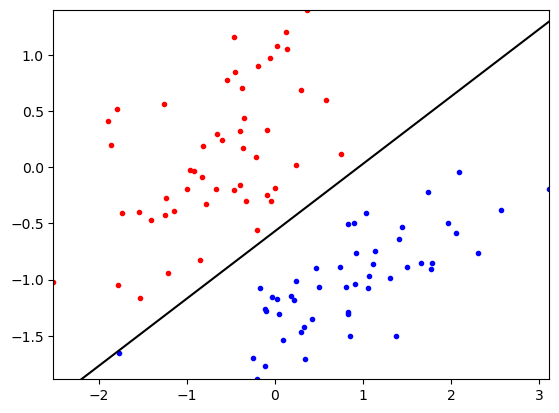

[ 2.98279335 -3.1482842   5.24495021] => 3.7234879844066966 / 0.0


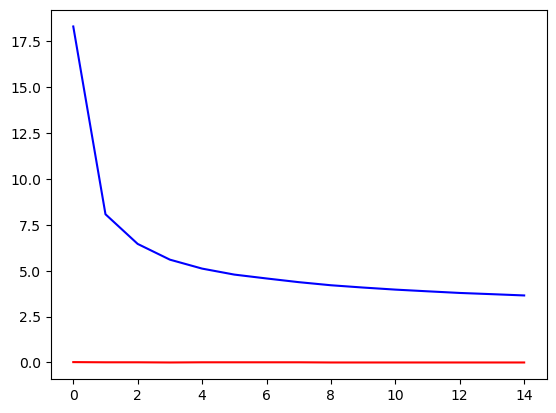

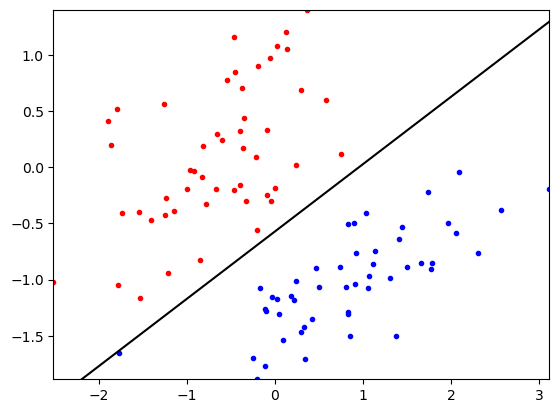

[ 3.01887642 -3.17266007  5.28594402] => 3.6536782633038802 / 0.0


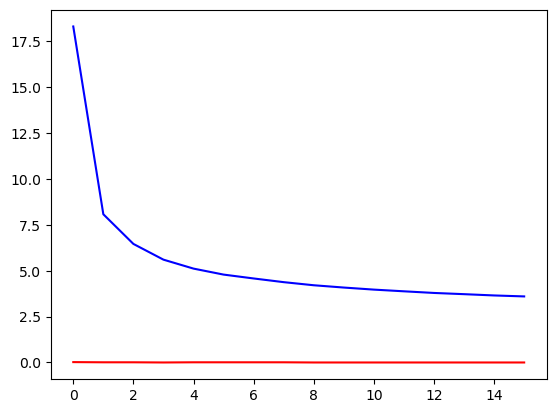

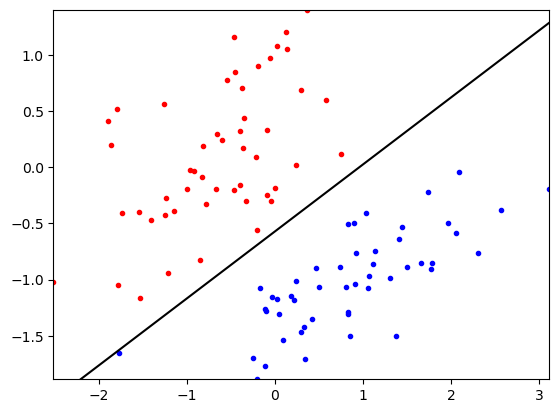

[ 3.04394386 -3.18437864  5.33329041] => 3.6010450335895245 / 0.0


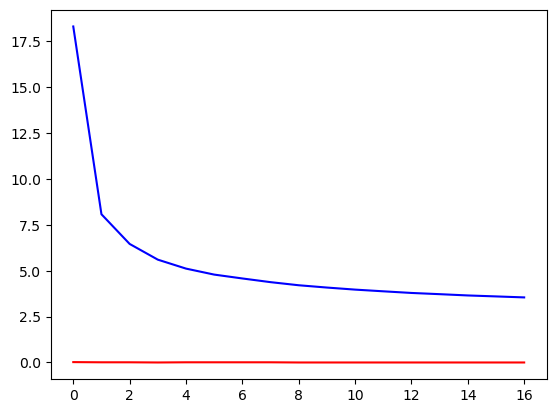

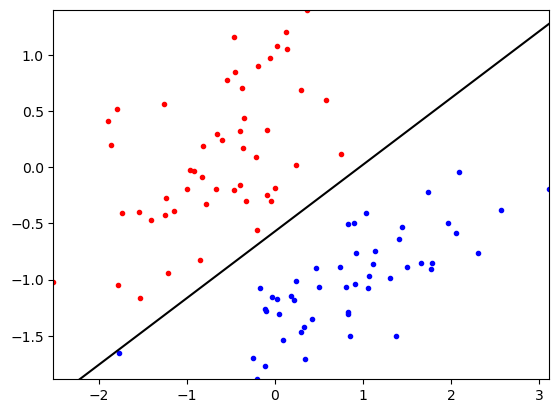

[ 3.06692207 -3.19586561  5.37714694] => 3.5473274777561845 / 0.0


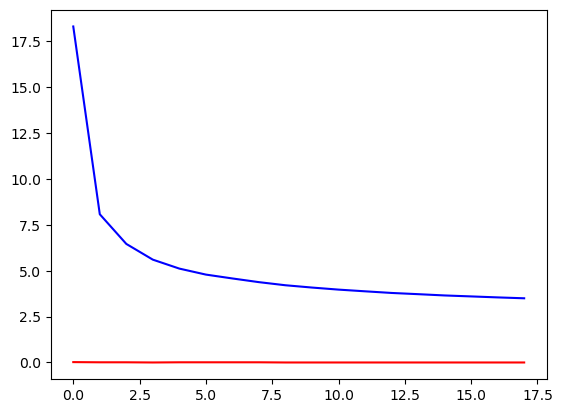

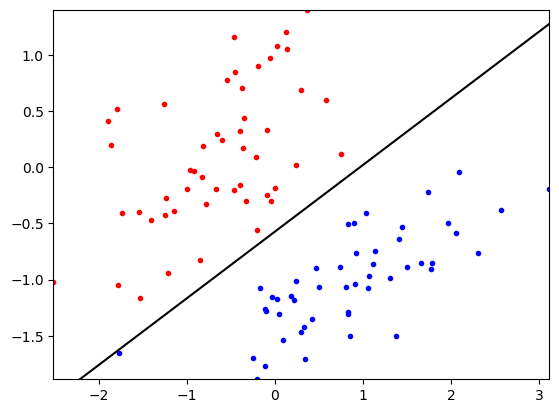

[ 3.0962302  -3.21402745  5.40974221] => 3.499052268385071 / 0.0


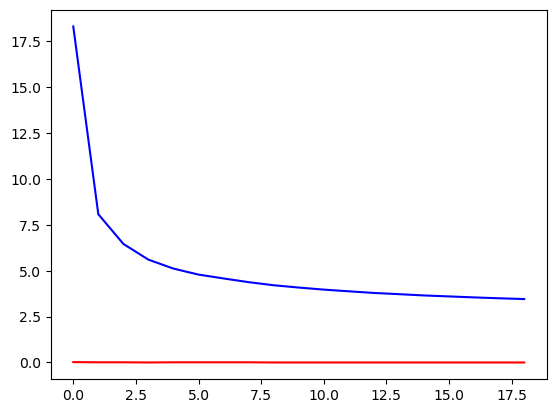

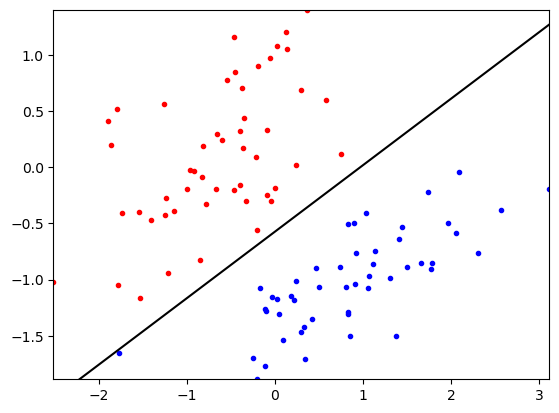

[ 3.11911578 -3.22669618  5.44500041] => 3.457656663548156 / 0.0


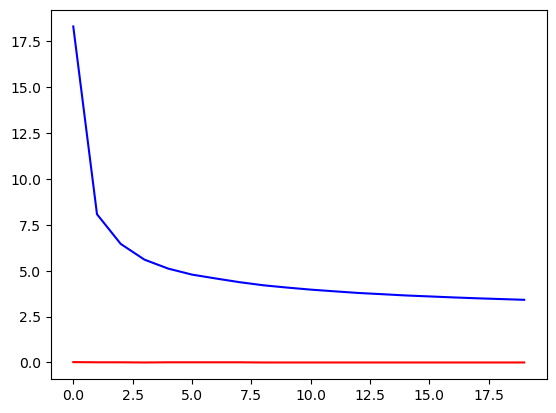

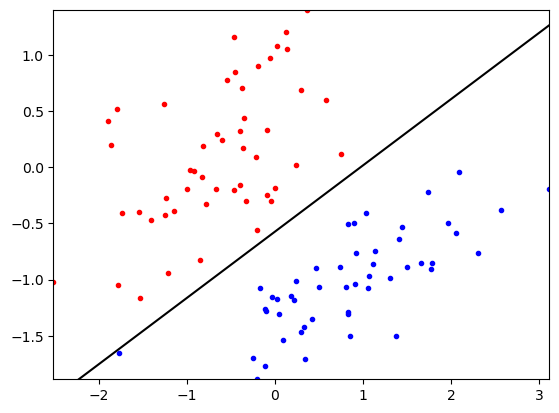

[ 3.13895583 -3.23662941  5.48012125] => 3.4166091581291878 / 0.0


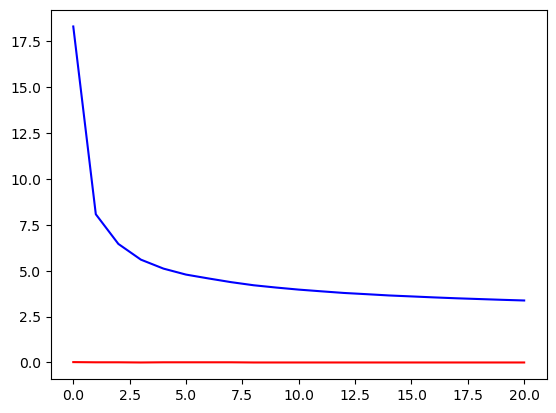

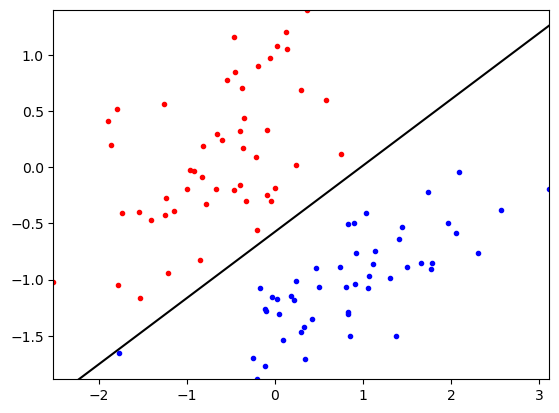

[ 3.16214525 -3.25108657  5.50815419] => 3.3791218793654614 / 0.0


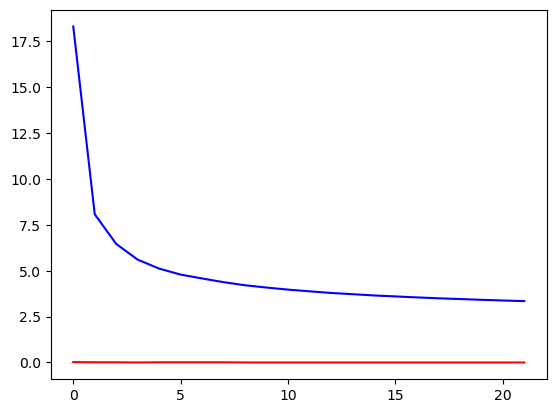

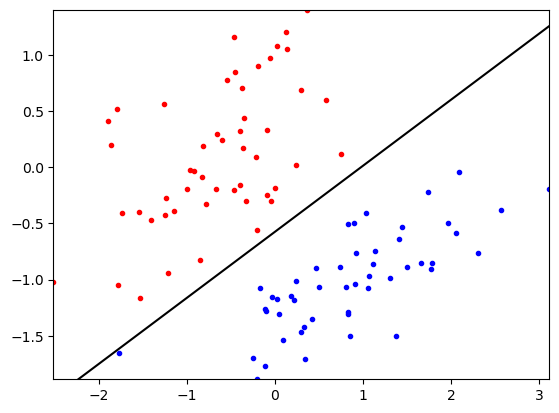

[ 3.17975148 -3.26039059  5.53905049] => 3.3450263182949107 / 0.0


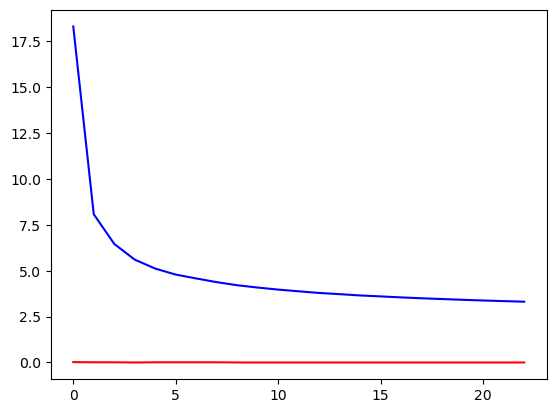

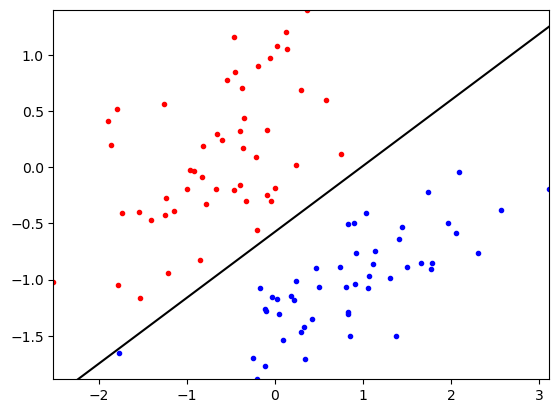

[ 3.19740504 -3.27035272  5.56723164] => 3.313214237901473 / 0.0


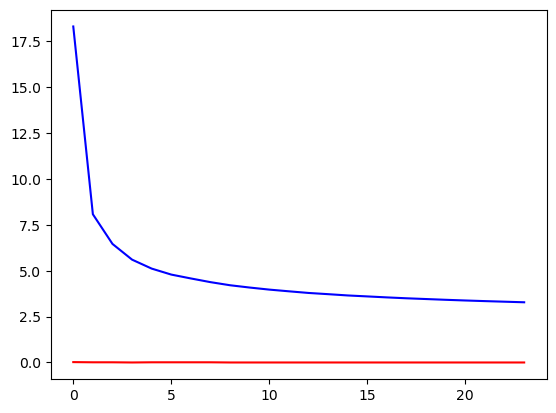

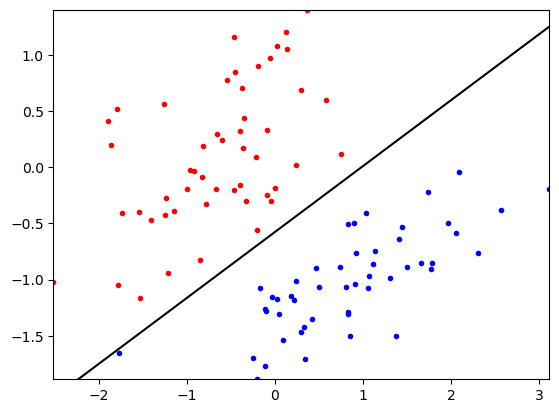

[ 3.21856411 -3.28374442  5.58948165] => 3.2811440779384733 / 0.0


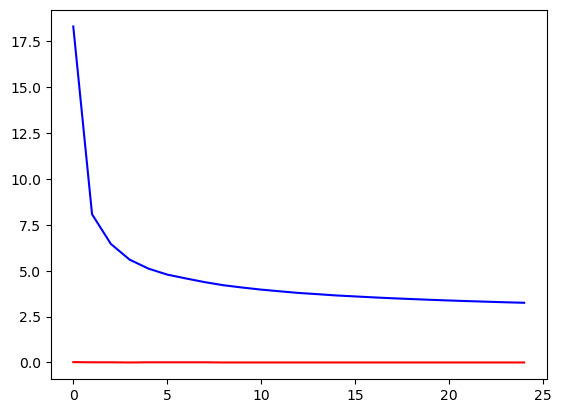

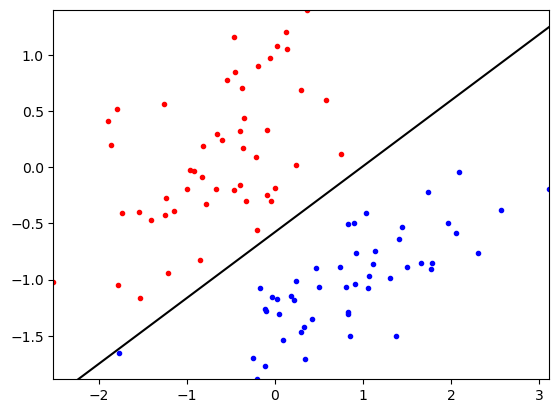

[ 3.23691227 -3.29488948  5.61250577] => 3.2543743857964285 / 0.0


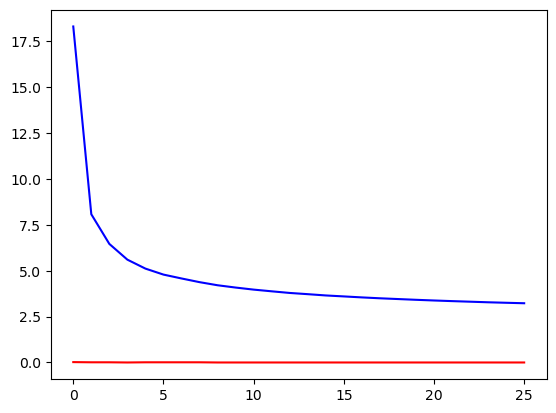

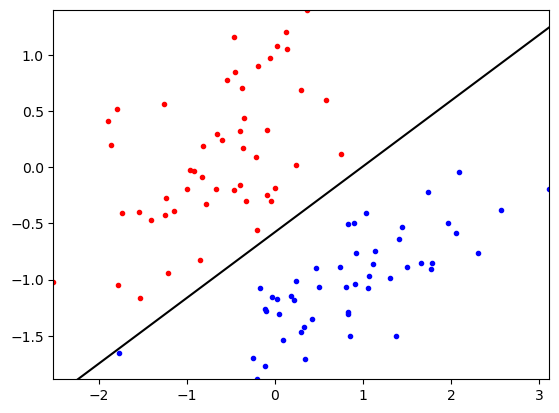

[ 3.25206916 -3.30302336  5.63697292] => 3.228901739253213 / 0.0


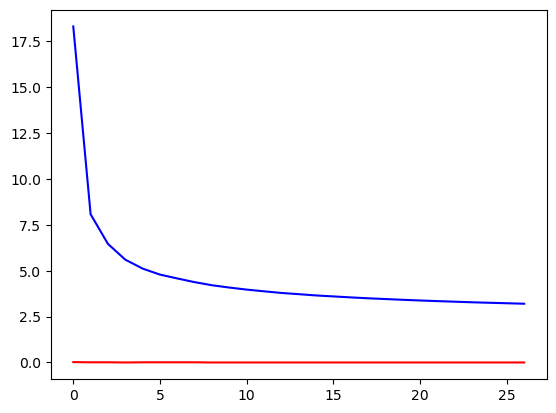

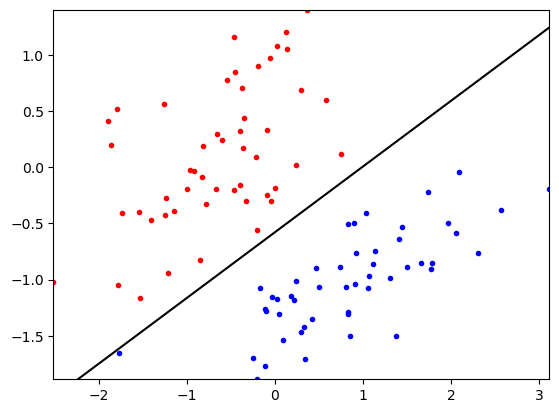

[ 3.26905586 -3.31351887  5.65759148] => 3.202485935362098 / 0.0


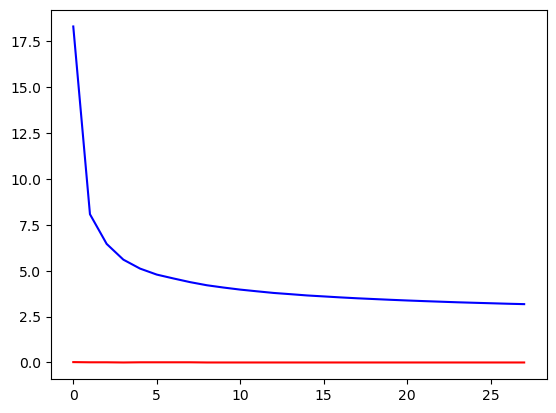

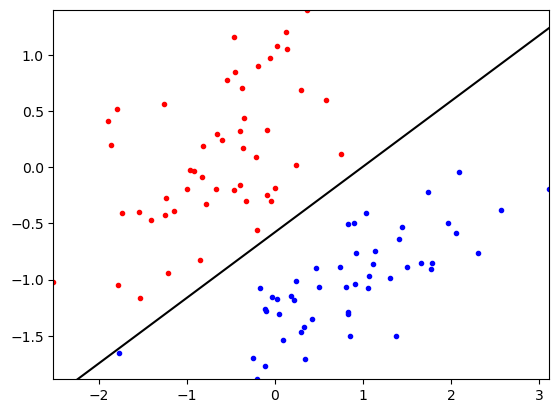

[ 3.28223269 -3.32076826  5.68050239] => 3.179955582007276 / 0.0


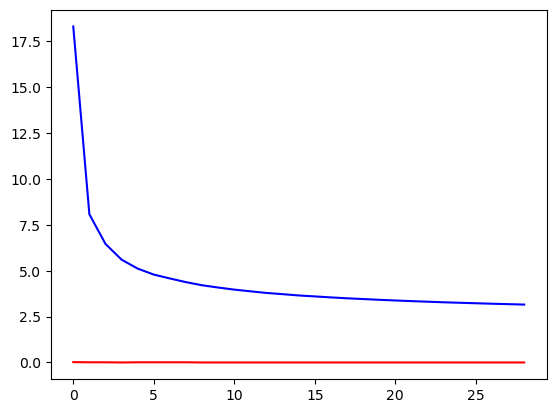

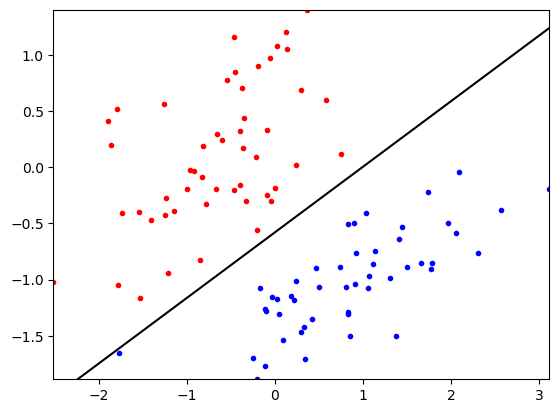

[ 3.29827368 -3.33071381  5.69895922] => 3.1561683721103257 / 0.0


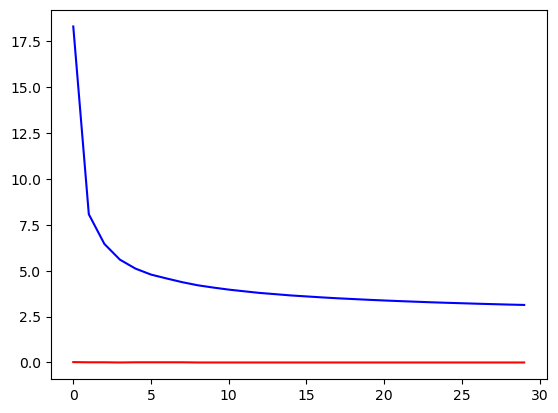

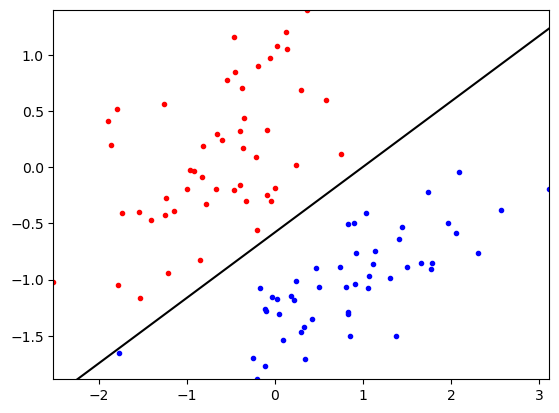

[ 3.31109886 -3.33773411  5.71942117] => 3.1366443189447177 / 0.0


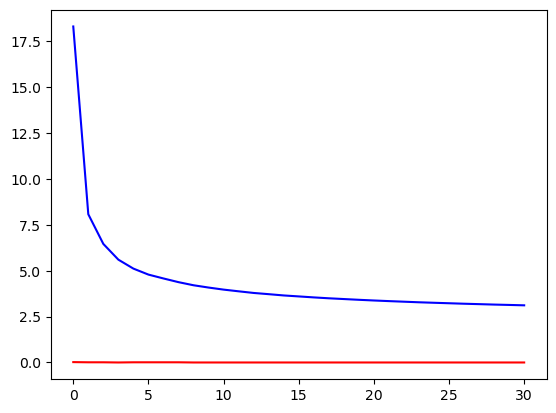

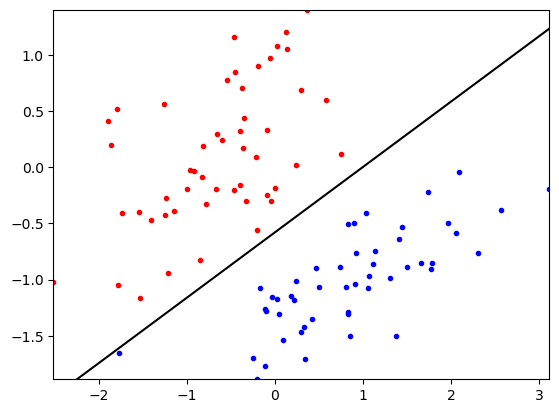

[ 3.32215271 -3.34410006  5.74007611] => 3.115479300340925 / 0.0


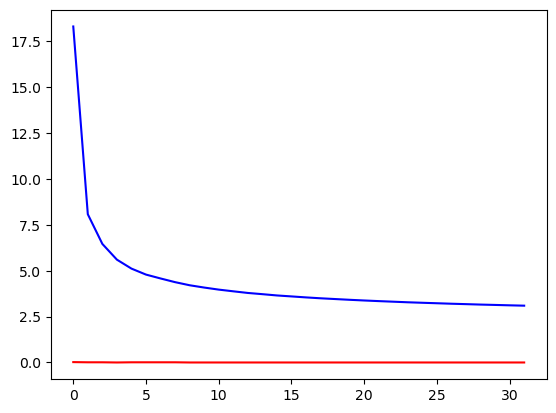

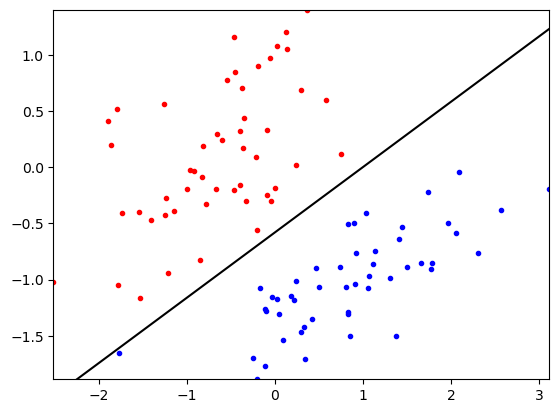

[ 3.335426   -3.35214344  5.75741131] => 3.096602309984272 / 0.0


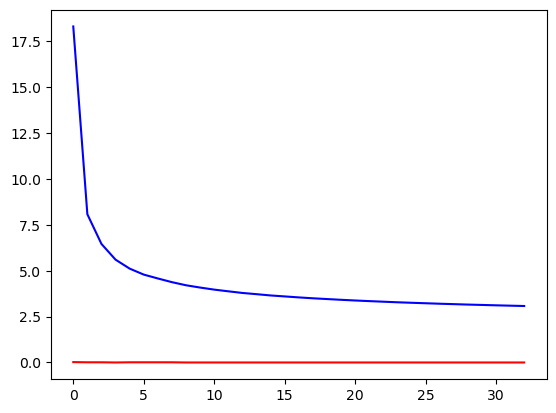

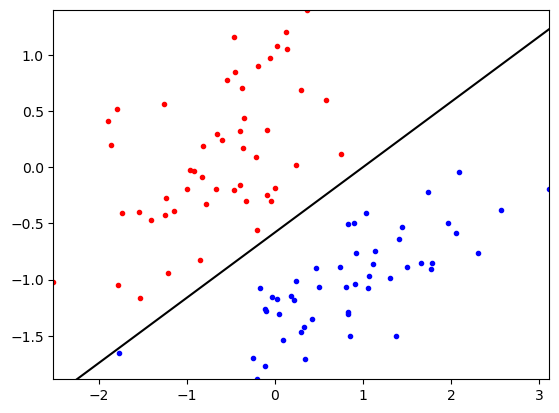

[ 3.34750953 -3.35981938  5.77464589] => 3.078317095582806 / 0.0


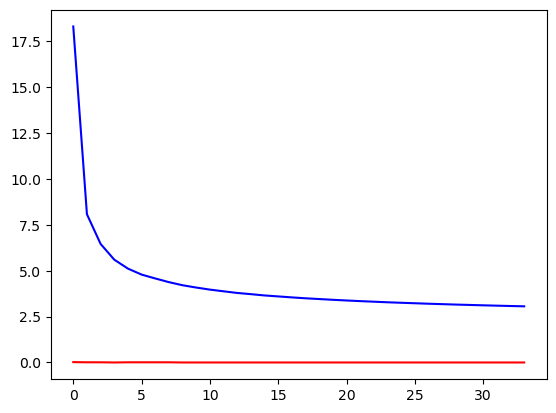

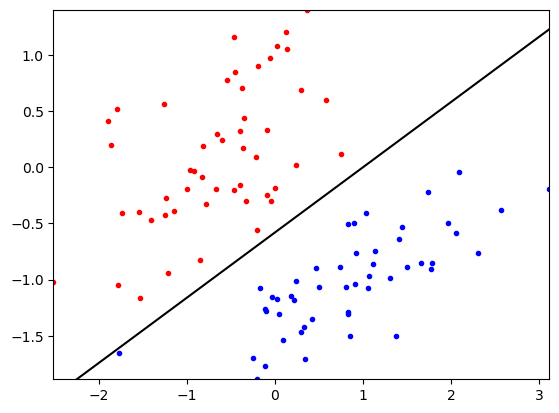

[ 3.35941757 -3.36663479  5.79129919] => 3.0609886516565115 / 0.0


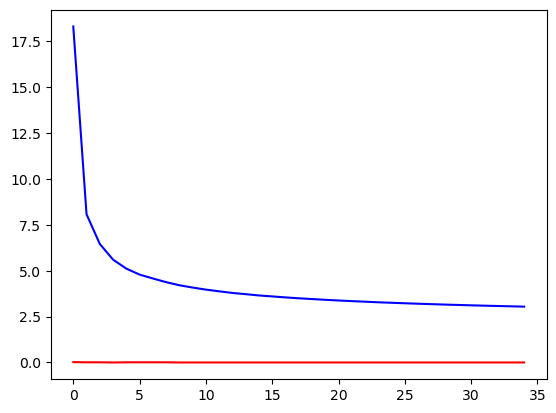

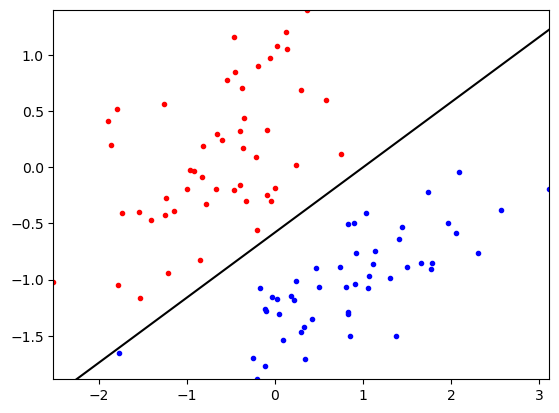

[ 3.36932117 -3.37209161  5.80887077] => 3.0437576761443443 / 0.0


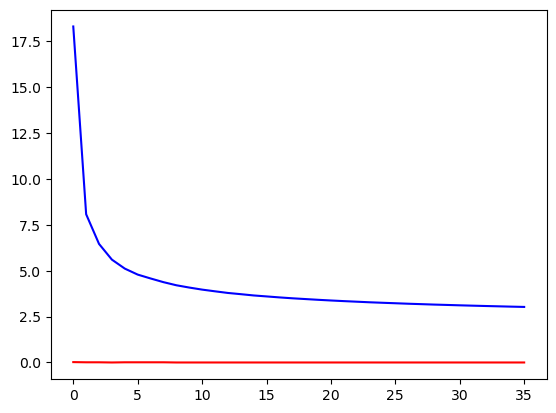

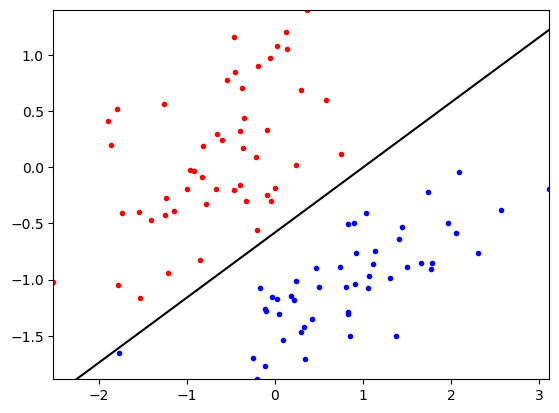

[ 3.38057361 -3.37880039  5.824156  ] => 3.0280471054539517 / 0.0


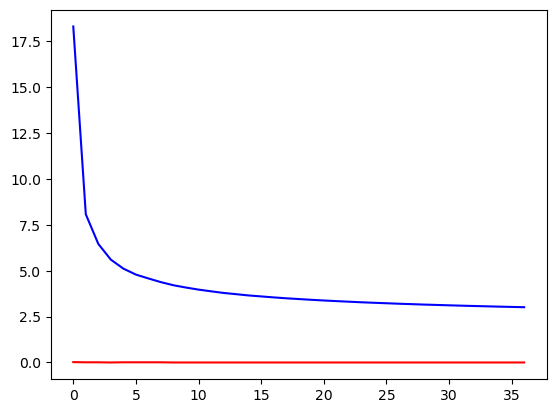

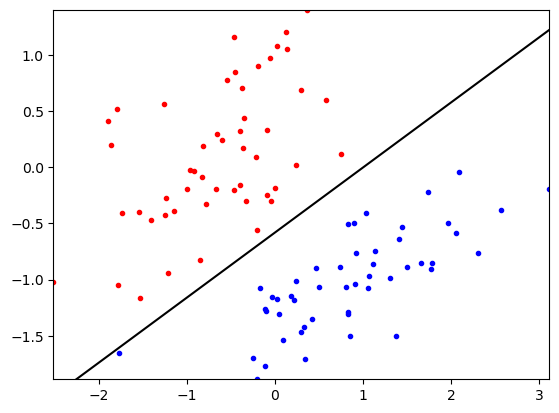

[ 3.39125471 -3.38524132  5.83913244] => 3.0125711311349517 / 0.0


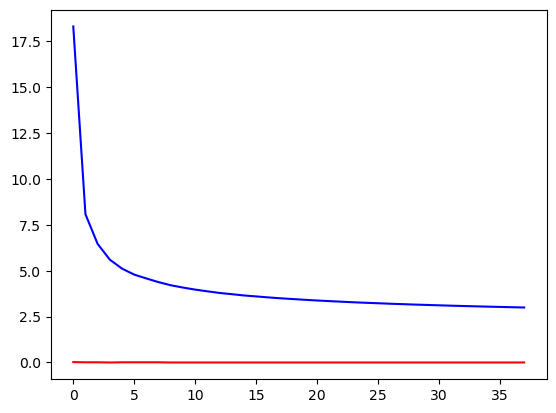

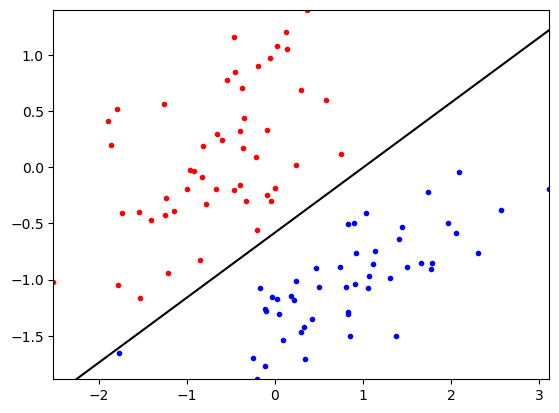

[ 3.40145583 -3.39190078  5.85354808] => 2.9973834627288802 / 0.0


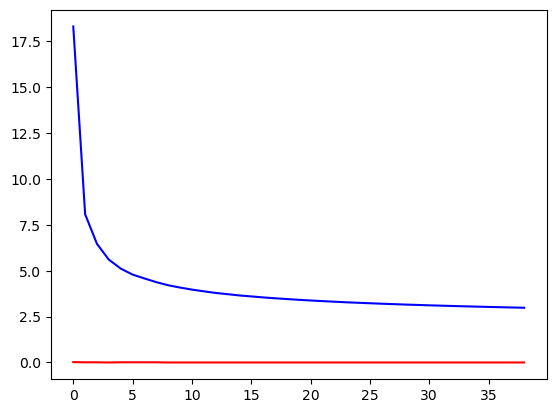

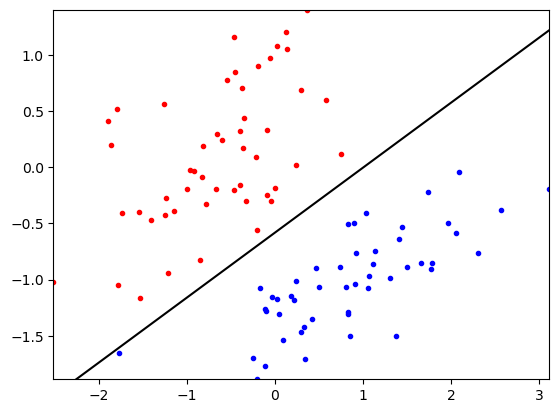

[ 3.41181072 -3.39807094  5.8673381 ] => 2.9832409671437516 / 0.0


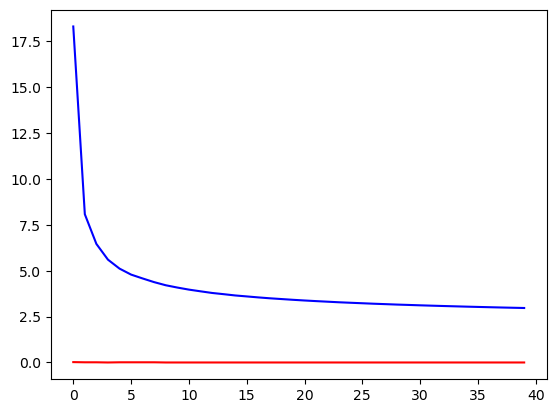

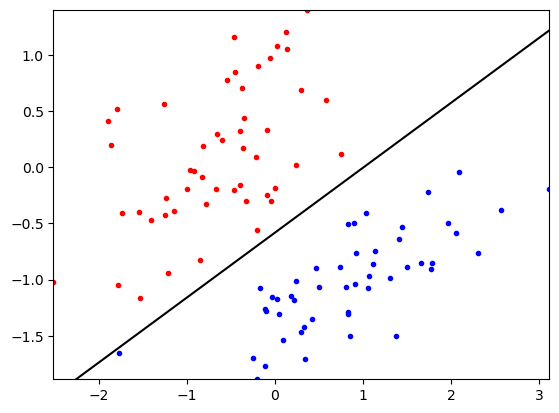

[ 3.42106909 -3.40327664  5.88151251] => 2.9699309386505117 / 0.0


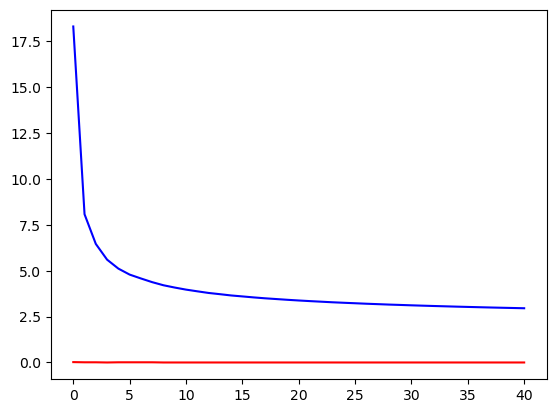

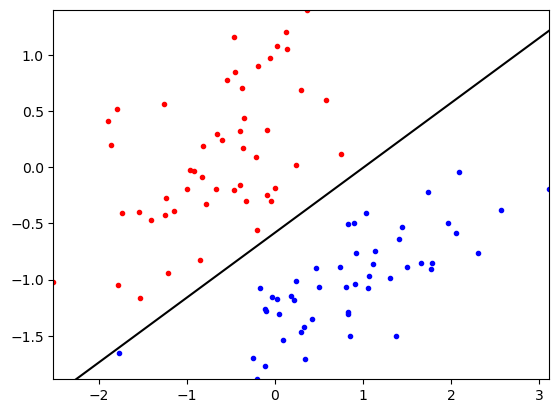

[ 3.43078333 -3.40900582  5.89456991] => 2.9561640216206957 / 0.0


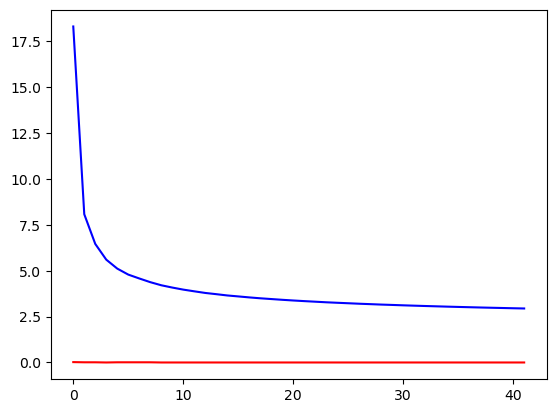

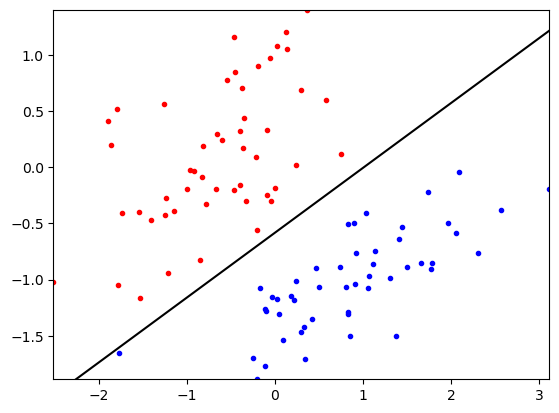

[ 3.43977123 -3.41452284  5.90754432] => 2.943633904065683 / 0.0


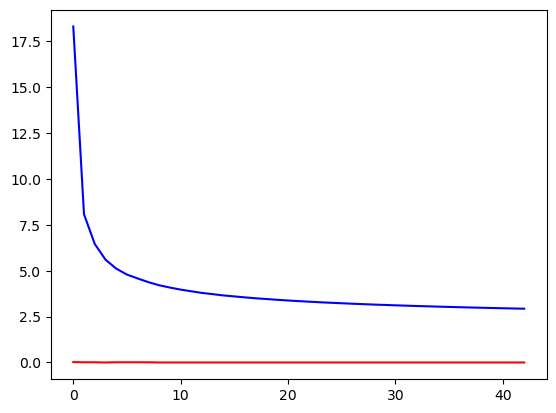

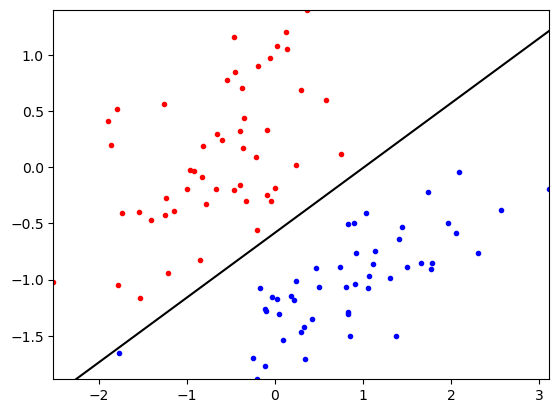

[ 3.44885199 -3.420086    5.9198673 ] => 2.9309891673668287 / 0.0


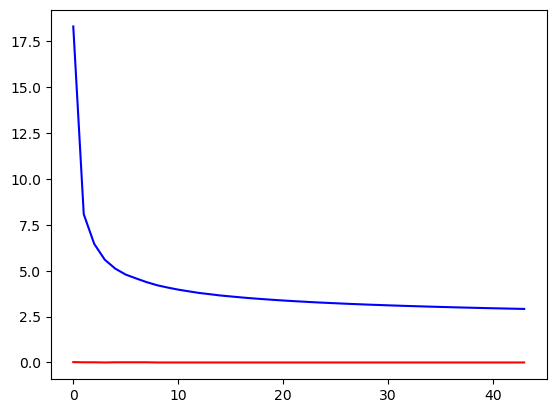

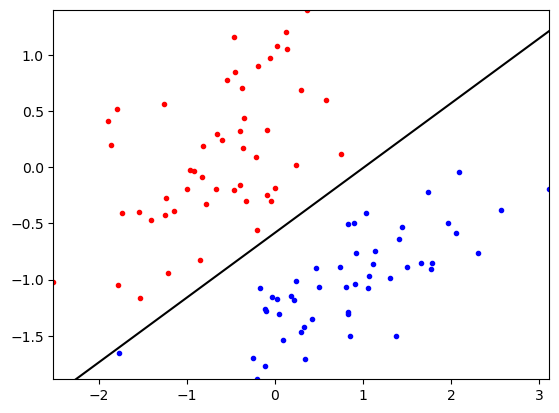

[ 3.4575078  -3.42528467  5.93202922] => 2.9192339463659716 / 0.0


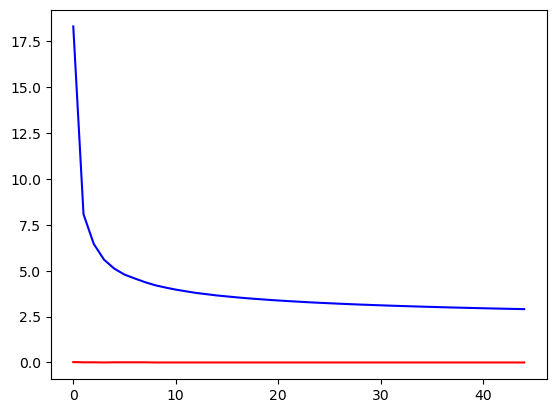

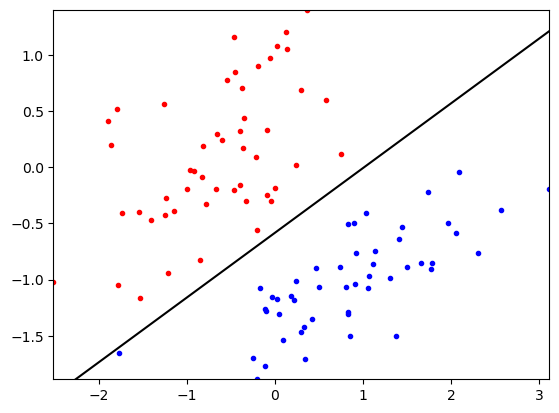

[ 3.46499517 -3.42946838  5.94484836] => 2.907780500316674 / 0.0


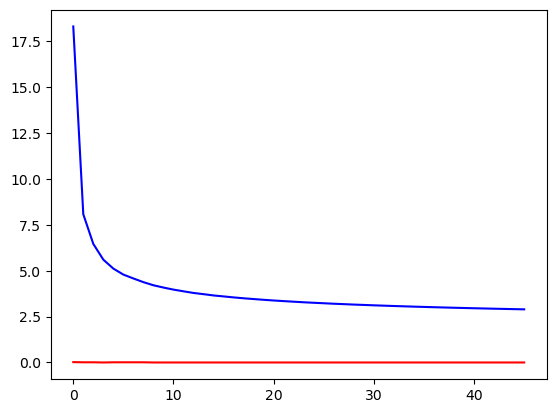

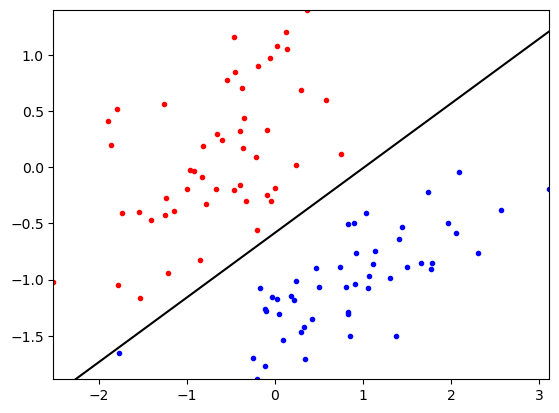

[ 3.47264839 -3.43385062  5.95697754] => 2.896689281289241 / 0.0


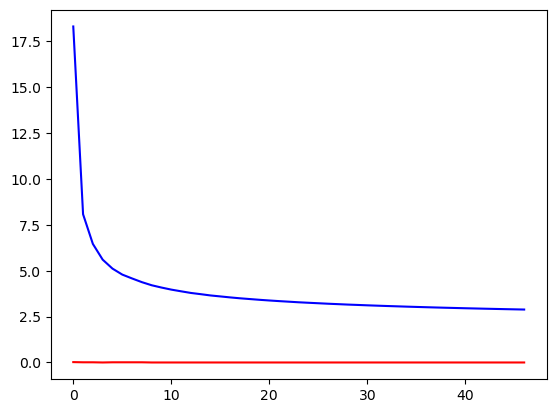

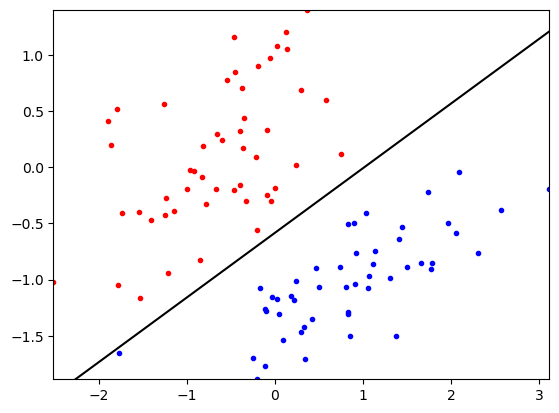

[ 3.48050554 -3.4385517   5.96837269] => 2.885693142018978 / 0.0


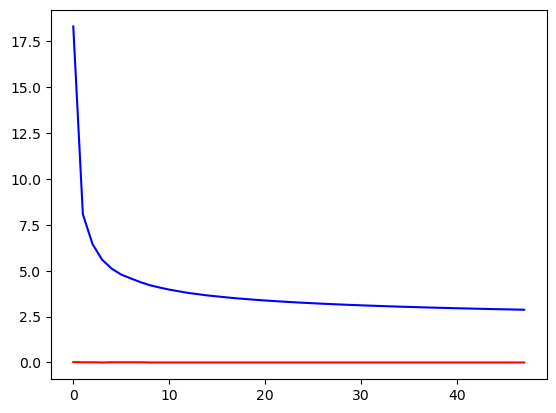

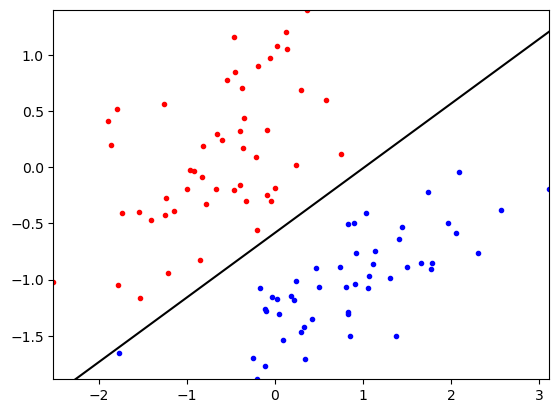

[ 3.488285   -3.44345956  5.97924853] => 2.875053863001923 / 0.0


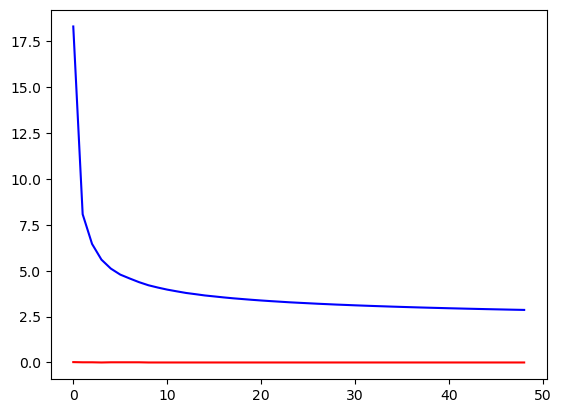

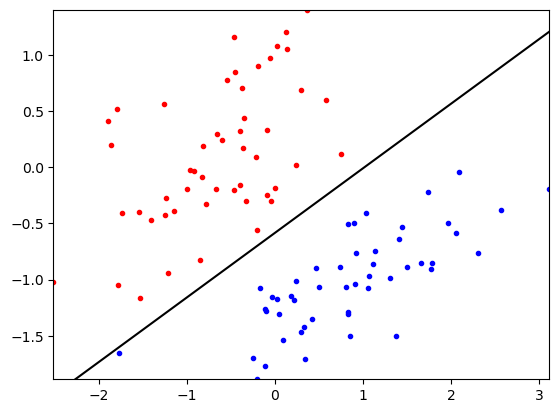

[ 3.49561704 -3.44760687  5.9903019 ] => 2.8651268002942905 / 0.0


In [20]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([0.,-0.,0]); # TODO: fill in values
learner.theta = wts; # set the learner’s parameters
(J1,J2) = learner.train(XA,YA,0.5,0.01,50)
plt.show()




In [21]:
learner.theta

array([ 3.49561704, -3.44760687,  5.9903019 ])

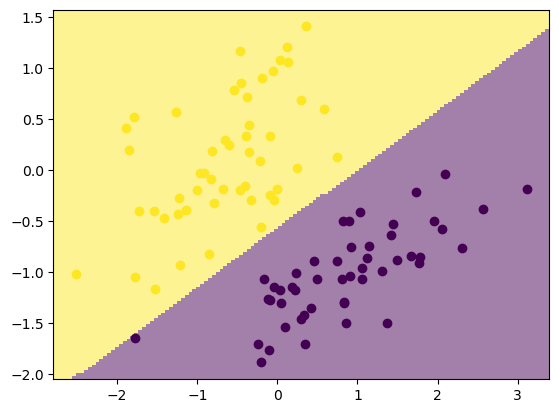

In [22]:
ml.plotClassify2D(learner, XA, YA)

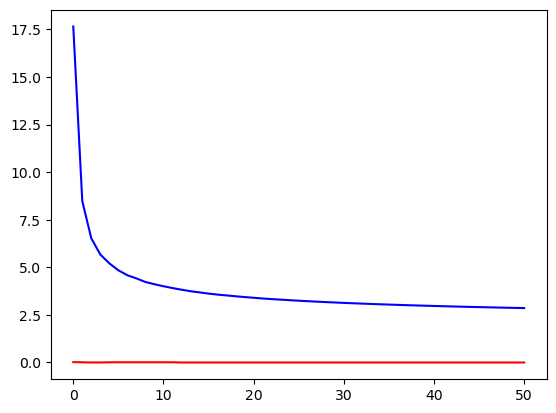

In [11]:
plt.plot(J1,"b")
plt.plot(J2,"r")

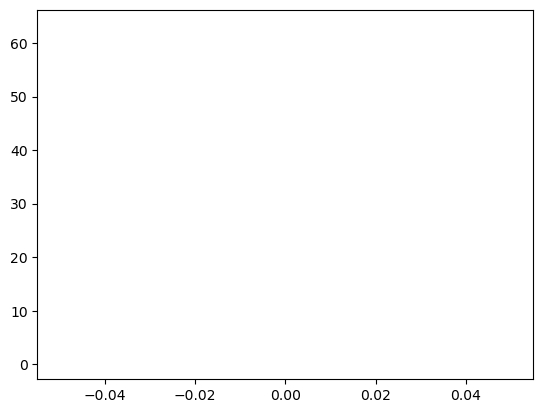

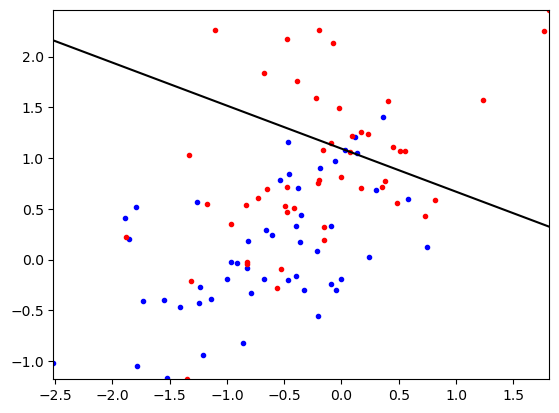

[-1.32699654  0.51507075  1.21406734] => 63.10244332439737 / 0.3333333333333333


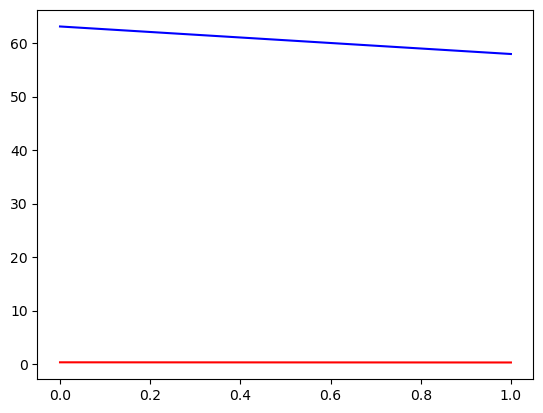

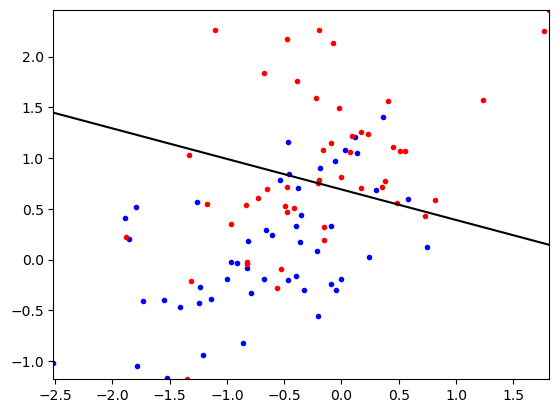

[-1.15590714  0.50354766  1.67311621] => 57.957355295218704 / 0.30303030303030304


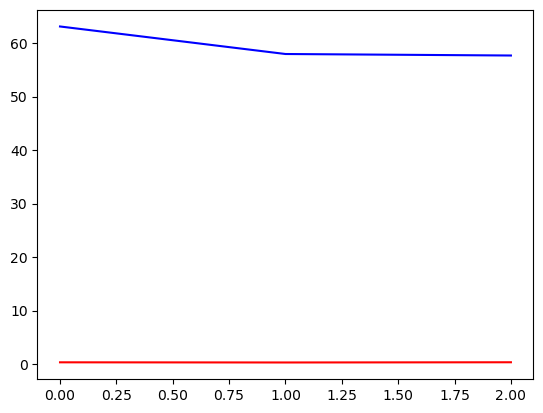

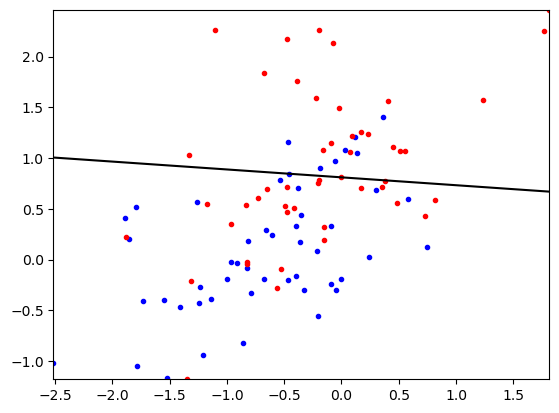

[-1.15252577  0.1104678   1.42243522] => 57.67617267410772 / 0.3434343434343434


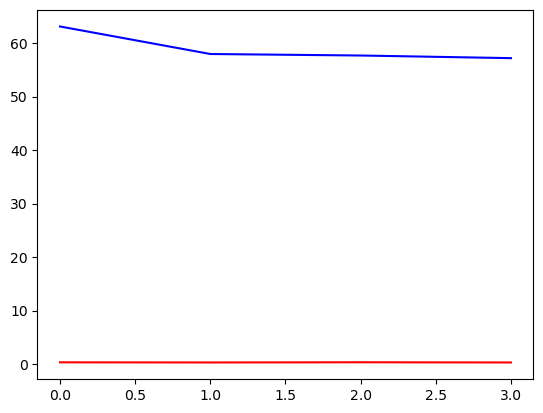

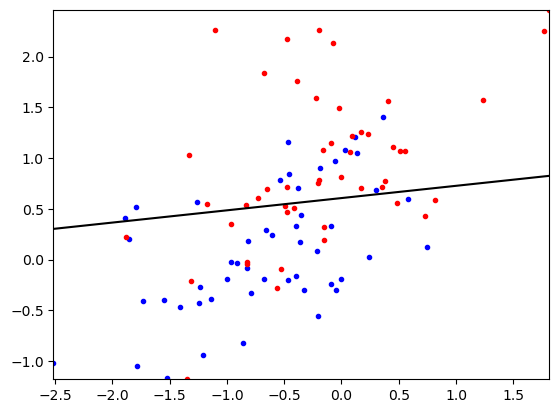

[-0.86528647 -0.17253806  1.42810881] => 57.18399836055546 / 0.30303030303030304


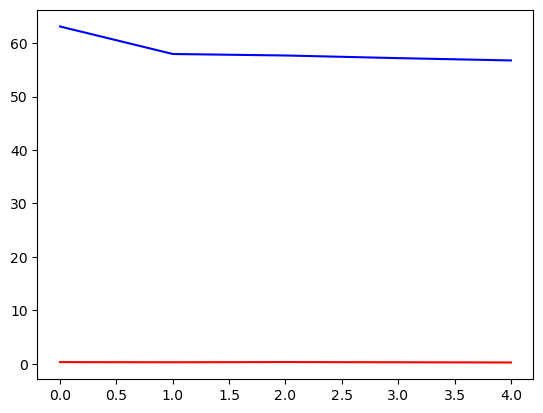

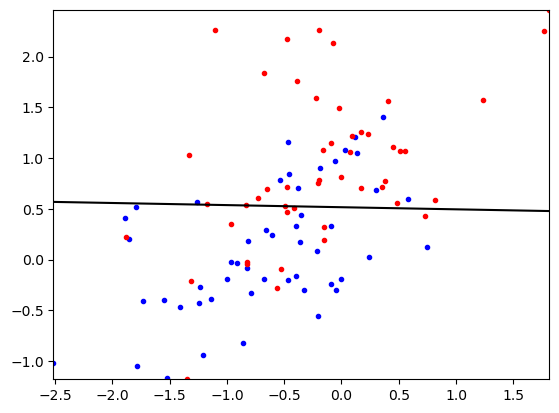

[-0.83577561  0.03374991  1.62053882] => 56.749010459193066 / 0.26262626262626265


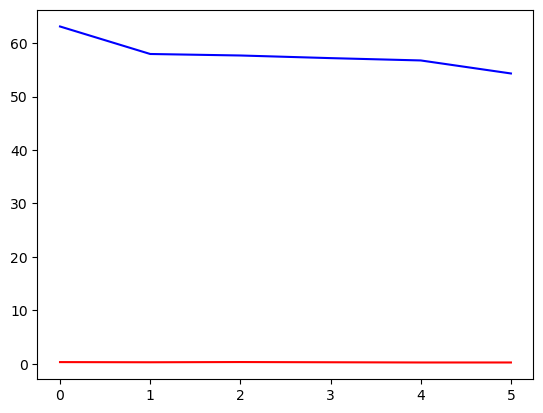

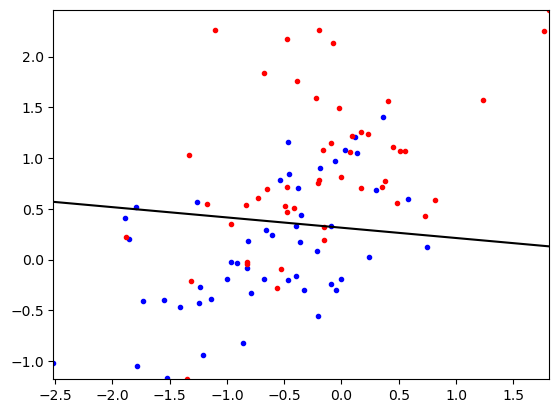

[-0.60713353  0.1963175   1.93590728] => 54.31381814670117 / 0.26262626262626265


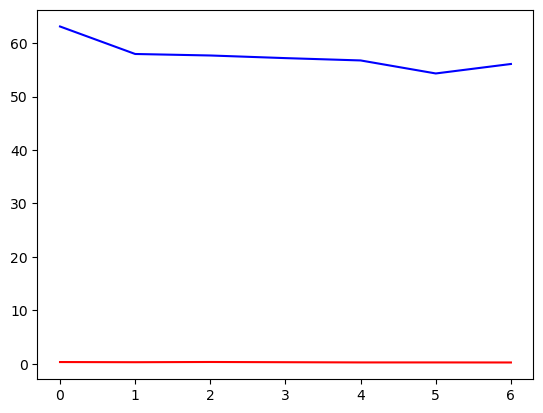

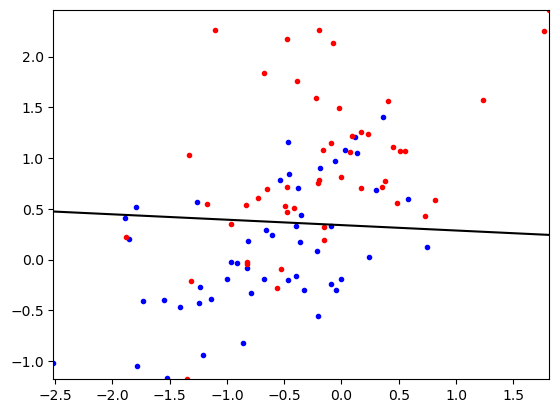

[-0.62888689  0.09866679  1.85326476] => 56.08680427453925 / 0.25252525252525254


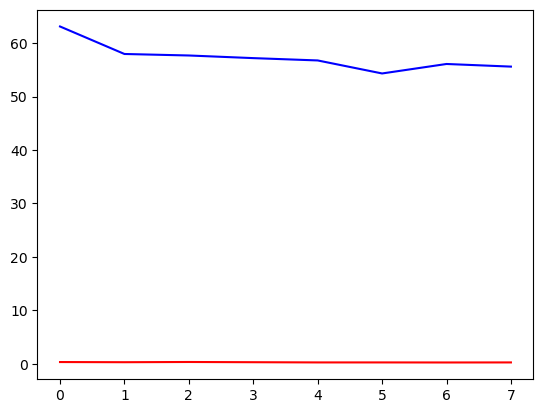

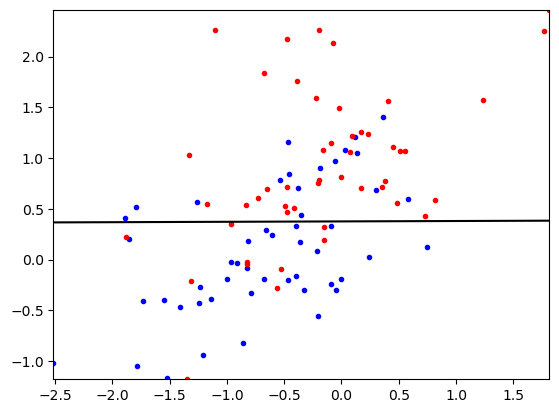

[-0.65224931 -0.00676698  1.73538585] => 55.59623539263747 / 0.26262626262626265


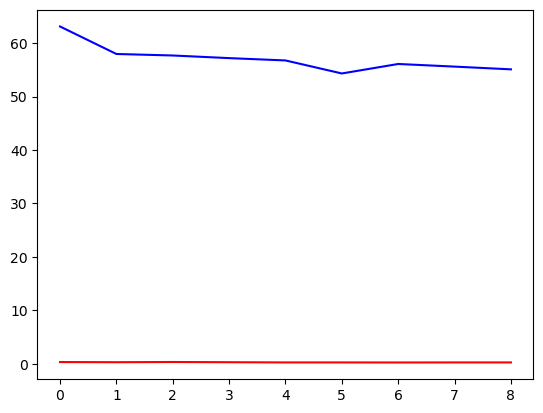

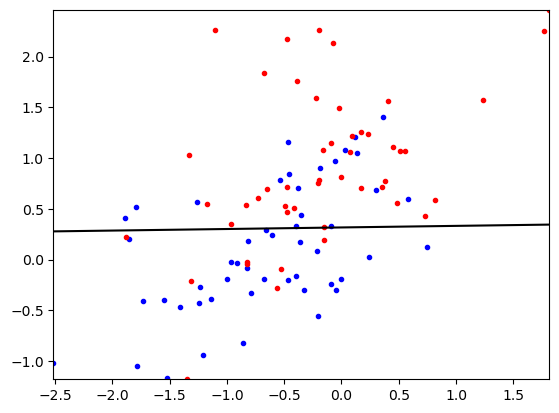

[-0.5620475  -0.02741868  1.77673295] => 55.083556490164064 / 0.26262626262626265


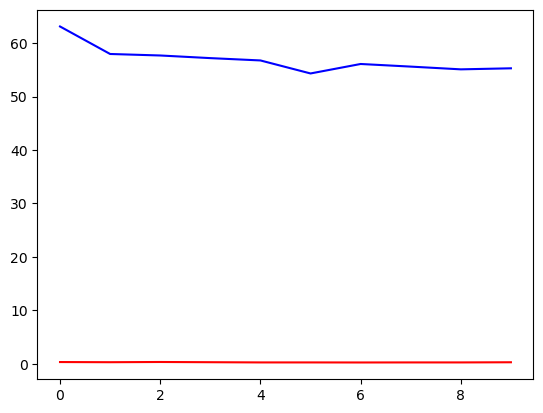

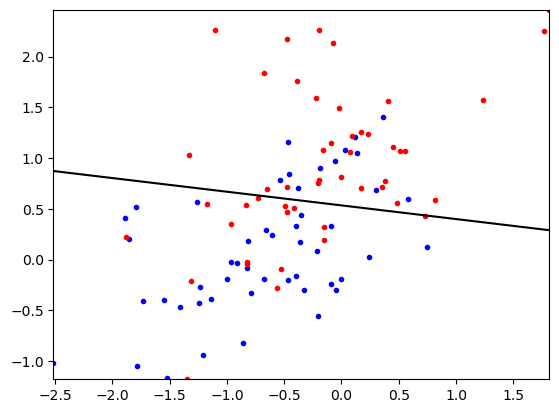

[-0.8785097   0.22182916  1.6461493 ] => 55.27819162789555 / 0.29292929292929293


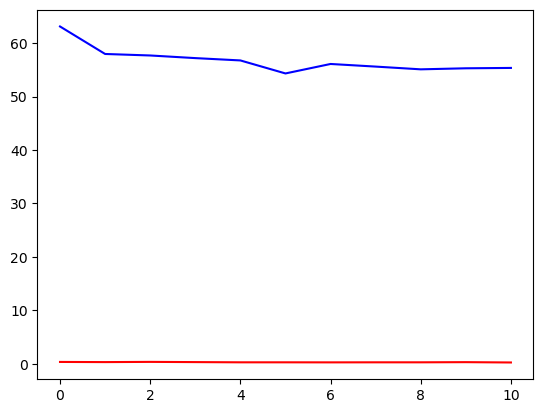

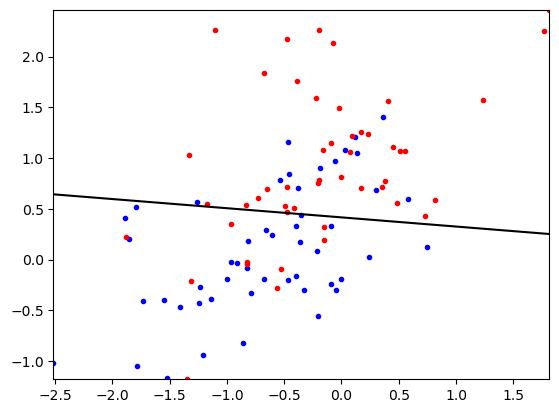

[-0.70710606  0.15376463  1.70154795] => 55.34662554695629 / 0.23232323232323232


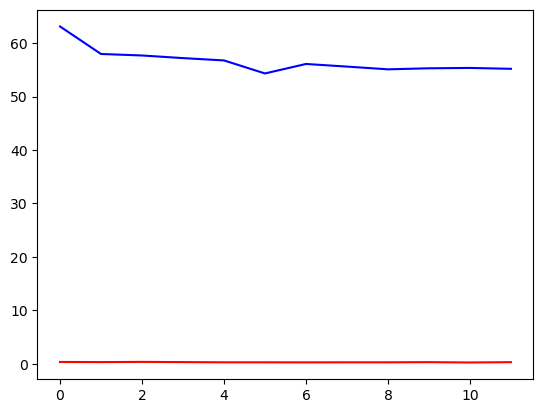

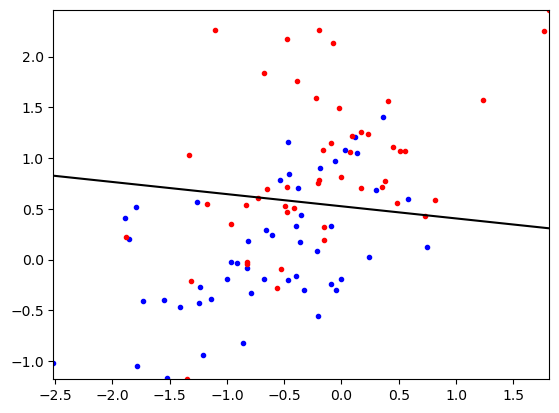

[-0.84046453  0.19184293  1.6008355 ] => 55.17848960048407 / 0.29292929292929293


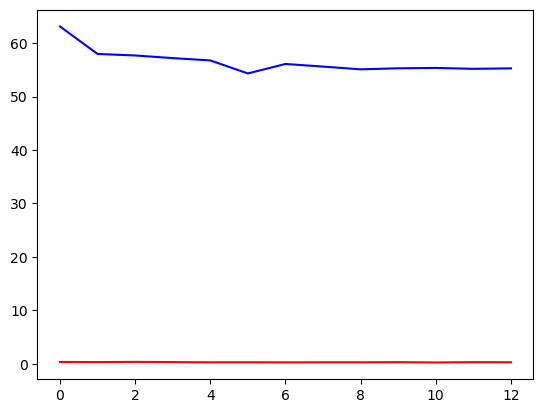

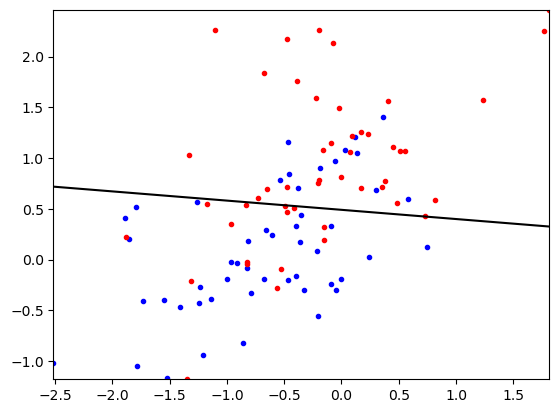

[-0.79370932  0.14713647  1.61963525] => 55.26722696242471 / 0.2727272727272727


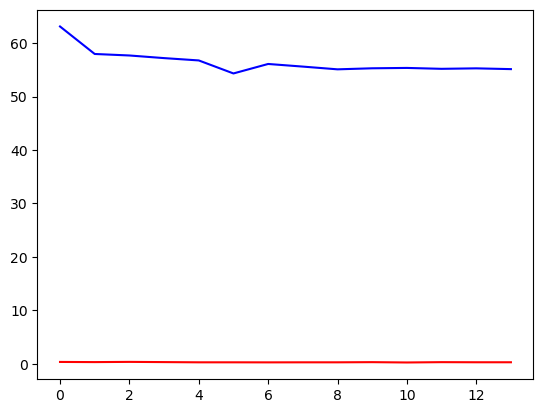

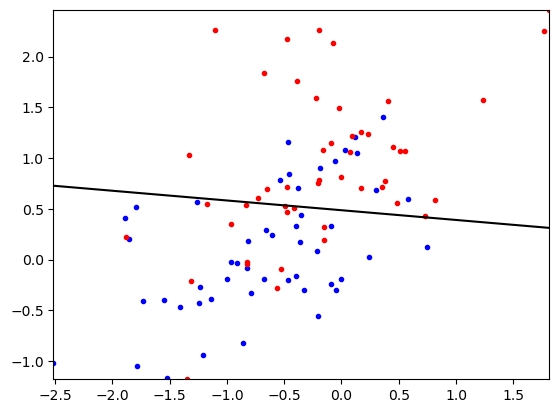

[-0.79408977  0.15685981  1.63361014] => 55.12272150483002 / 0.2727272727272727


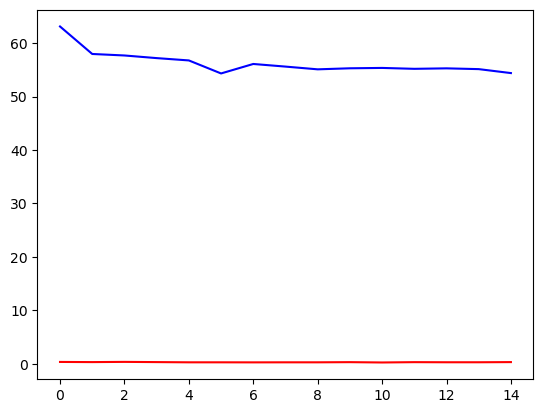

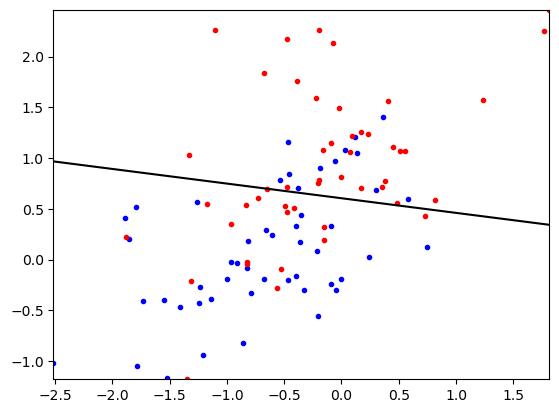

[-0.94171743  0.22495487  1.55833447] => 54.382368868386415 / 0.30303030303030304


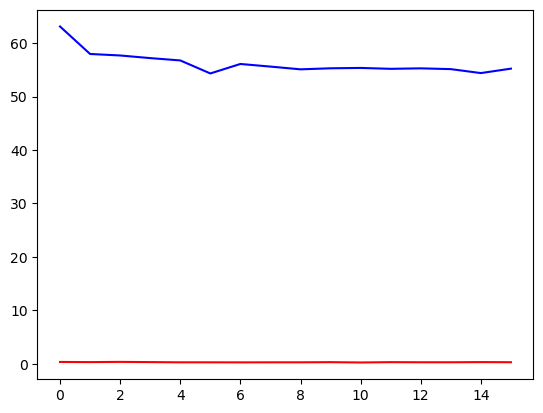

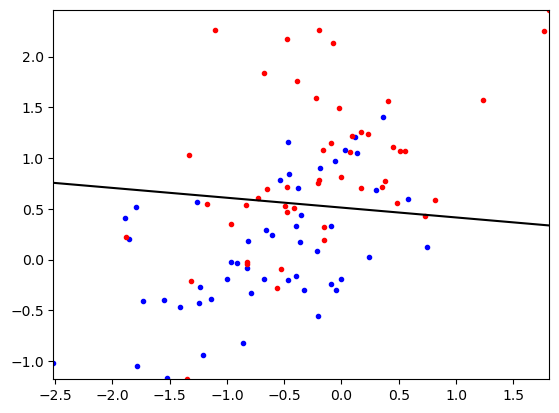

[-0.82374894  0.15622319  1.60900949] => 55.213769599592226 / 0.2828282828282828


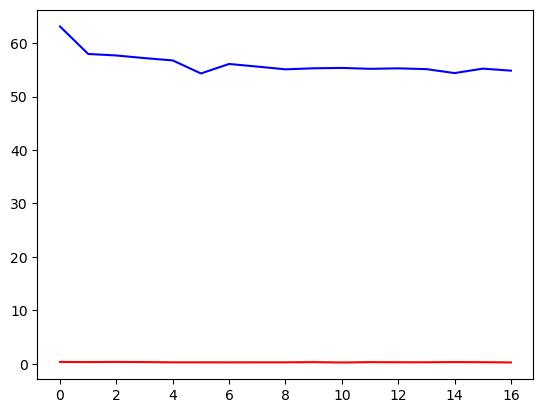

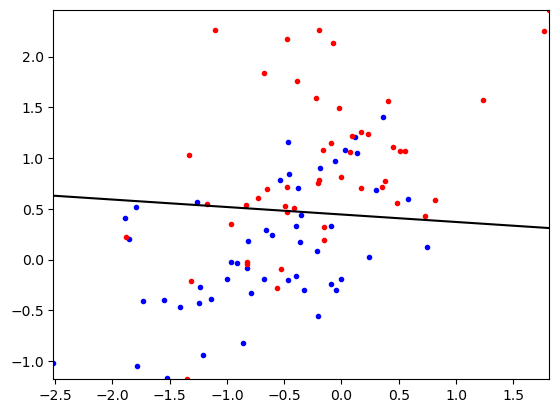

[-0.73813868  0.12258017  1.66274214] => 54.8365556624637 / 0.24242424242424243


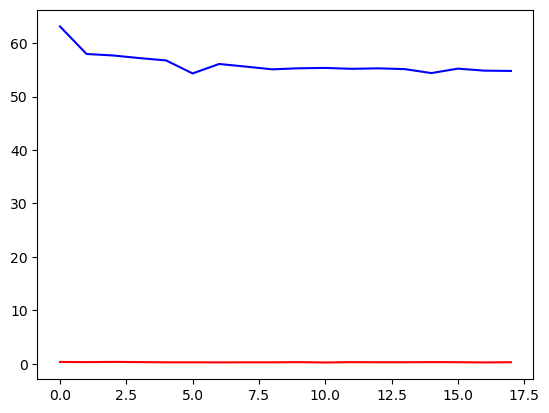

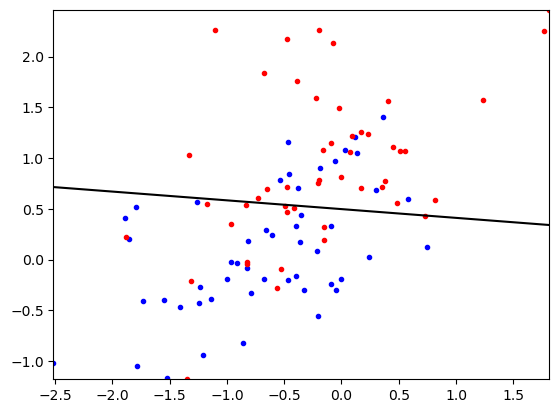

[-0.80250556  0.13948745  1.61438701] => 54.783622755801126 / 0.2828282828282828


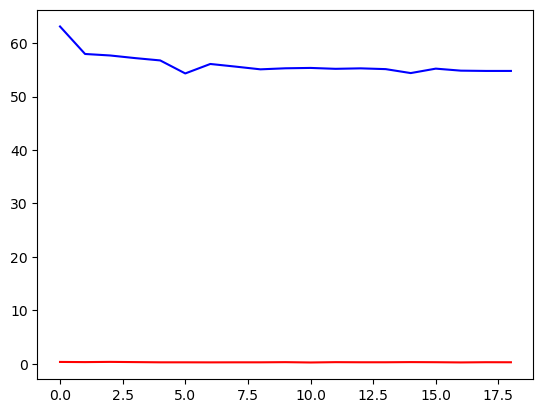

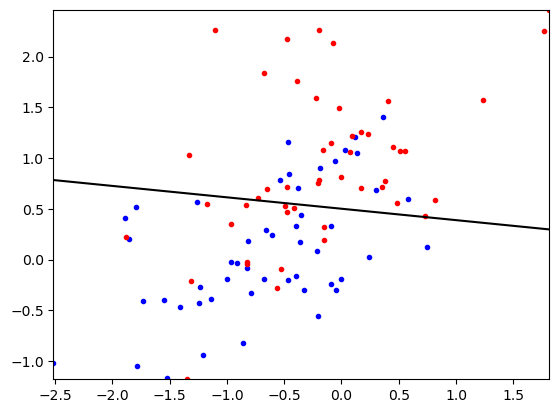

[-0.81583478  0.18318873  1.62908645] => 54.783448590820655 / 0.2727272727272727


In [11]:
learner2 = logisticClassify2(); # create "blank" learner
learner2.classes = np.unique(YB) # define class labels using YA or YB
wts = np.array([0.,-0.,0]); # TODO: fill in values
learner2.theta = wts; # set the learner’s parameters
(J21,J22) = learner2.train(XB,YB,0.5,0.01,100)
plt.show()

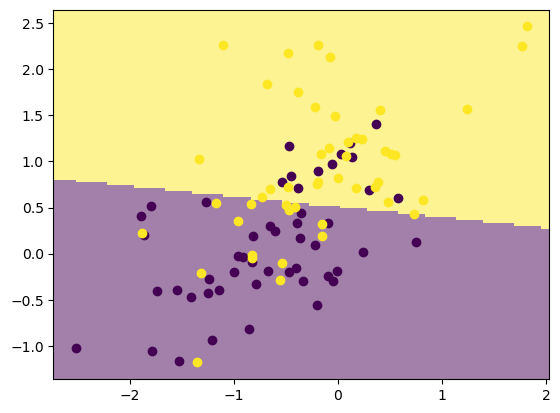

In [12]:
ml.plotClassify2D(learner2, XB, YB)

0.2727272727272727


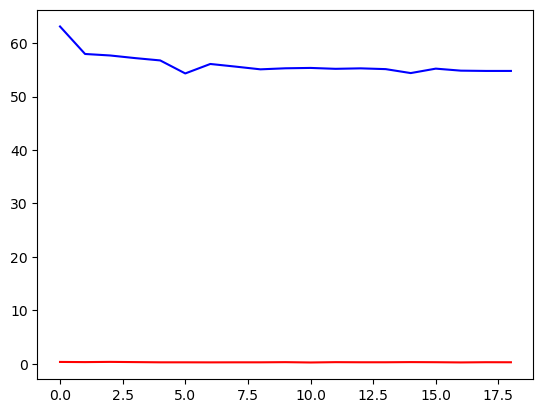

In [13]:
plt.plot(J21,"b")
plt.plot(J22,"r")
print(J22[-1])

In [ ]:
    def train_with_l1(self, X, Y, alpha=2.0,initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];

        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            loss = 0
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri  = np.matmul(XX[i,:],self.theta)     # TODO: compute linear response r(x)
                sigmoid = 1/(1+np.exp(-ri))
                gradi = (sigmoid-YY[i])*(XX[i,:])+alpha*np.sign(self.theta)/M   # TODO: compute gradient of NLL loss
                self.theta -= stepsize * gradi;  # take a gradient step
                jsur = (-YY[i])*np.log(sigmoid)-(1-YY[i])*np.log(1-sigmoid)+alpha*np.sum(np.abs(self.theta))/M
                loss = loss+jsur

            J01.append( self.err(X,Y) )  # evaluate the current error rate

            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
            Jnll.append( loss ) # TODO evaluate the current NLL loss

            plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
            if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
            plt.pause(.01);                    # let OS draw the plot

            print(self.theta,"=>",Jnll[-1],'/',J01[-1])
            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            done = epoch > stopEpochs
            #input("continue:")
            if epoch >3:
                done = done or abs(Jnll[-2]-Jnll[-1]) <stopTol
        return Jnll,J01


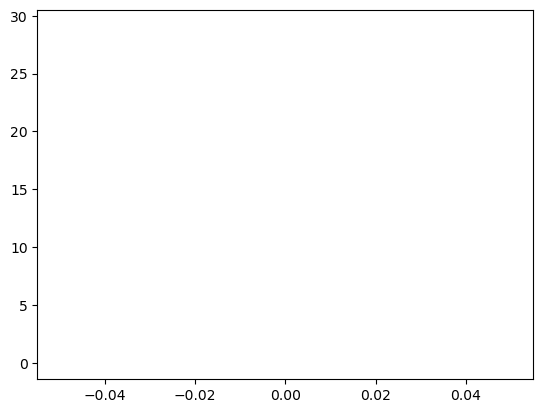

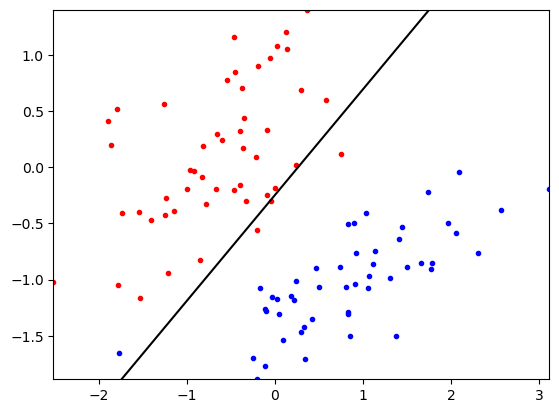

[ 0.57584655 -2.20343228  2.337542  ] => 29.07518320978459 / 0.04040404040404041


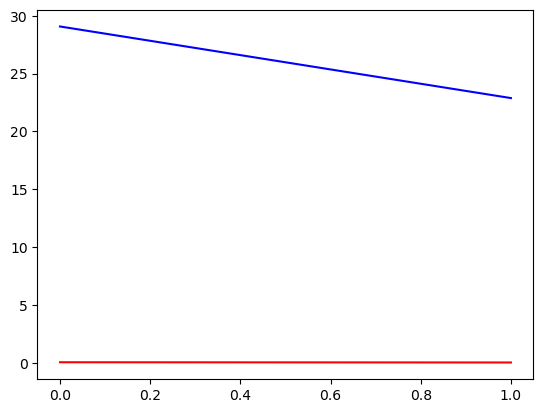

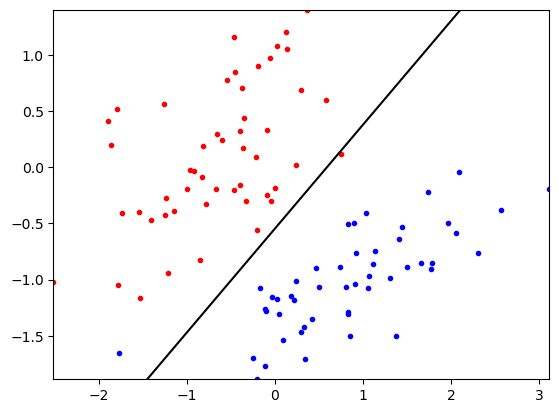

[ 1.30921748 -2.22276094  2.40092097] => 22.883979748166077 / 0.020202020202020204


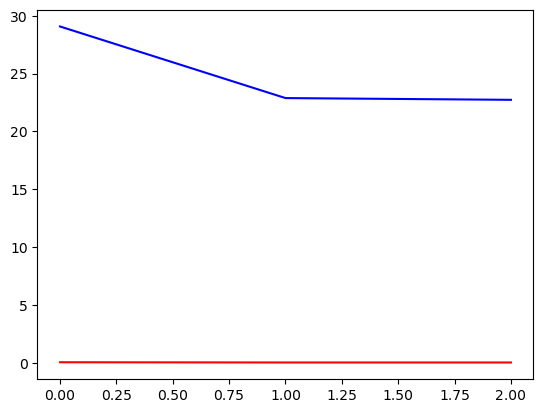

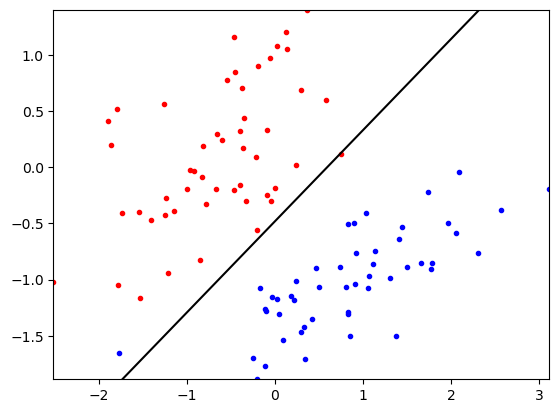

[ 1.27667774 -2.15885642  2.65712454] => 22.732427681586817 / 0.020202020202020204


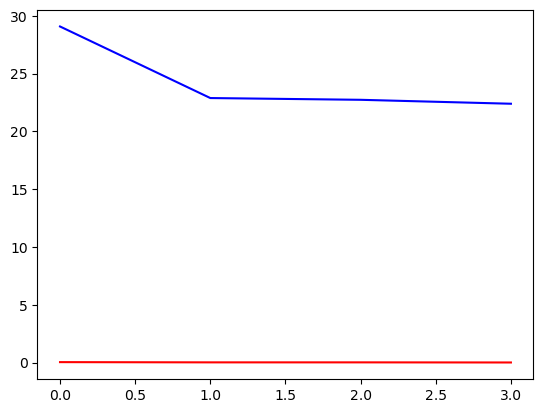

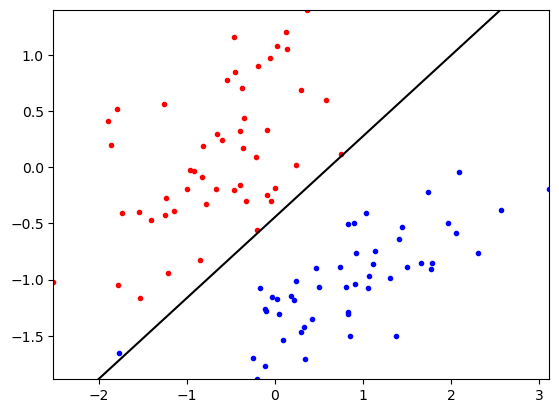

[ 1.24852531 -2.03173214  2.81828768] => 22.391798900786007 / 0.010101010101010102


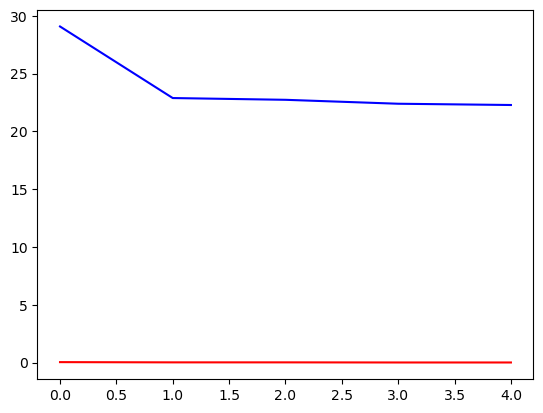

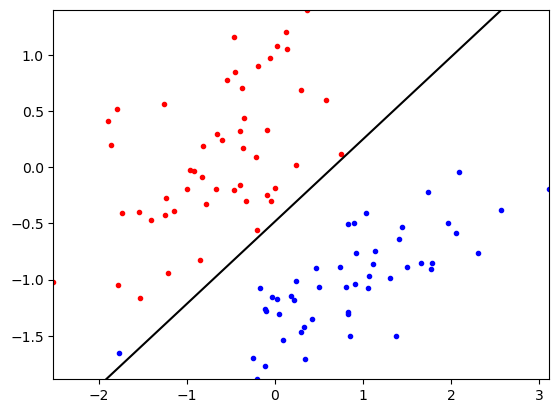

[ 1.3530748  -2.05686385  2.80468515] => 22.282467648787605 / 0.010101010101010102


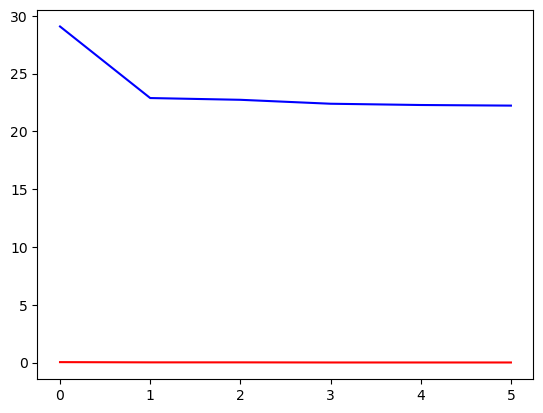

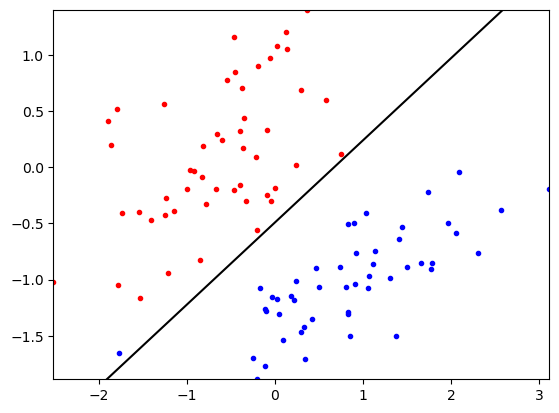

[ 1.38349383 -2.0636153   2.8189896 ] => 22.23013135916471 / 0.010101010101010102


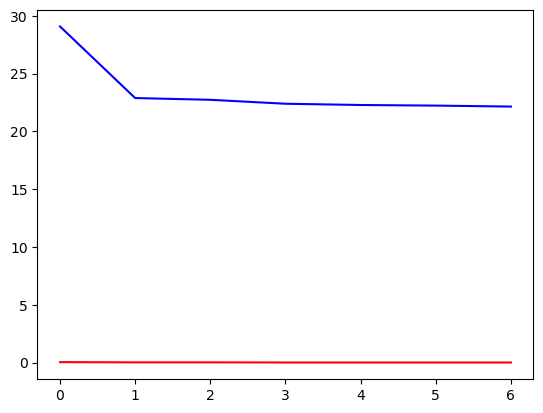

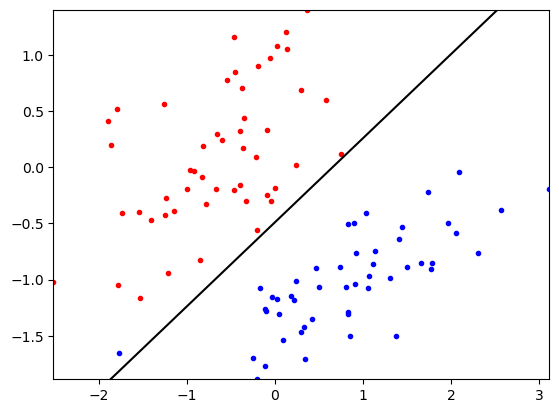

[ 1.38212571 -2.11731924  2.8253197 ] => 22.148134057224723 / 0.010101010101010102


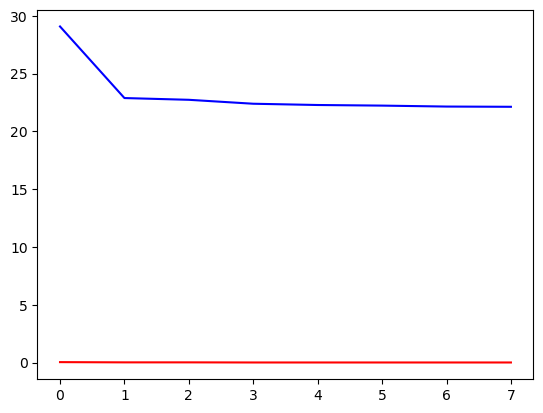

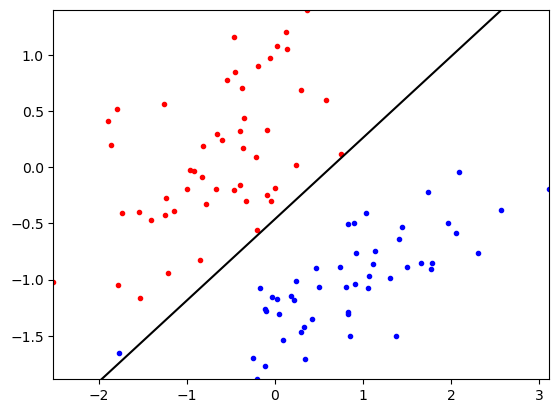

[ 1.32908863 -2.08990334  2.88344446] => 22.127956985984042 / 0.010101010101010102


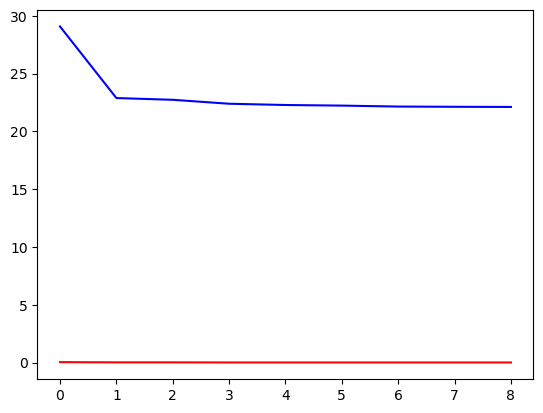

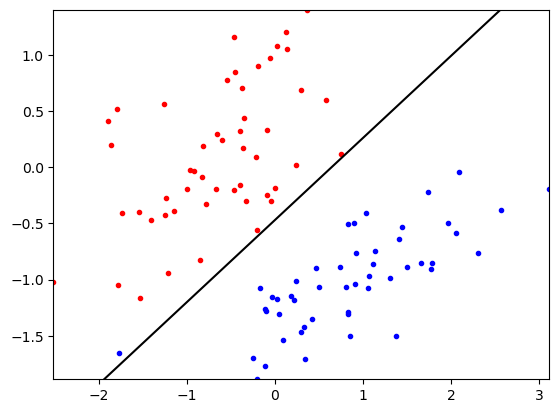

[ 1.35030123 -2.10595229  2.87836418] => 22.114586340504395 / 0.010101010101010102


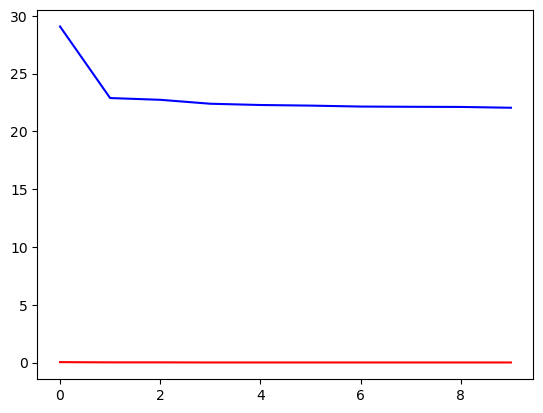

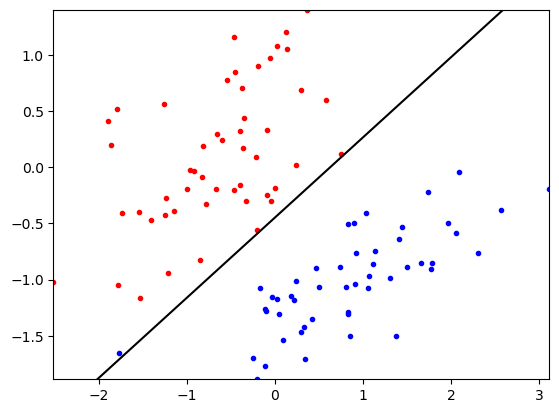

[ 1.30512815 -2.08603172  2.91938034] => 22.045002606352966 / 0.010101010101010102


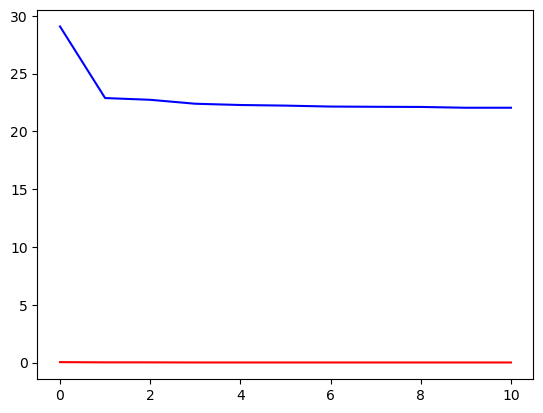

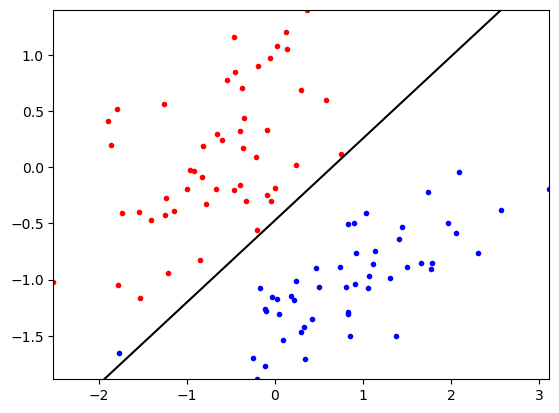

[ 1.36119842 -2.10605746  2.88380247] => 22.0456687629272 / 0.010101010101010102


In [12]:
learner = logisticClassify2(); 
learner.classes = np.unique(YA) 
wts = np.array([0.,-0.,0]); 
learner.theta = wts; 
(J1,J2) = learner.train_with_l1(XA,YA,2,0.5,0.01,50)
plt.show()

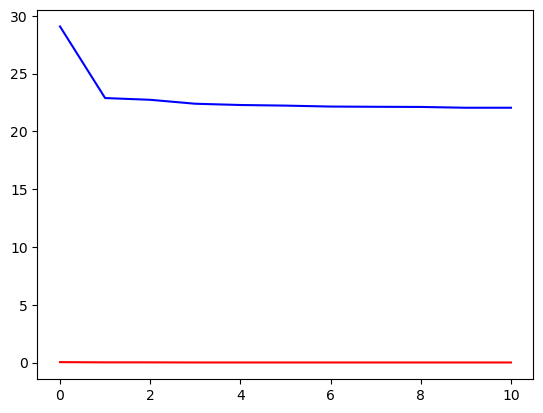

In [15]:
plt.plot(J1,"b")
plt.plot(J2,"r")

In [13]:
learner.theta

array([ 1.36119842, -2.10605746,  2.88380247])

Compared with the theta trained without regulation components:
array([ 3.49561704, -3.44760687,  5.9903019 ])
The absolute value of trained theta with L1 regulation is less
And it takes less iterations to converge.
But the training error is higher due to the model gets less "complicated" because it was "punished" by regulation components.

c:\mcsuci\273P\homework\Assignment 3\Assignment 3\mltools\plot.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  axis.plot( X[Y==c,0],X[Y==c,1], 'ko', color=cmap(cvals[i]), **kwargs )


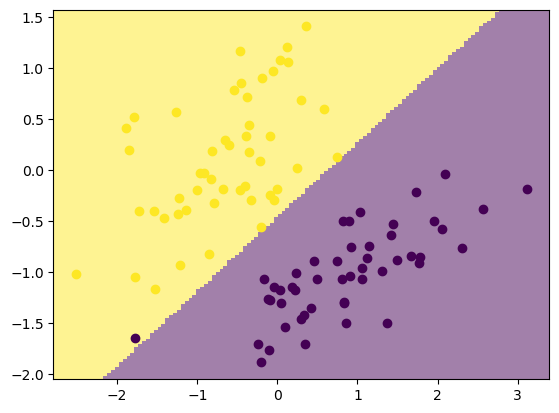

In [14]:
ml.plotClassify2D(learner, XA, YA)

In [ ]:
   def train_with_l2(self, X, Y, alpha=2.0,initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];

        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            loss = 0
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri  = np.matmul(XX[i,:],self.theta)     # TODO: compute linear response r(x)
                sigmoid = 1/(1+np.exp(-ri))
                gradi = (sigmoid-YY[i])*(XX[i,:])+2*alpha*self.theta/M   # TODO: compute gradient of NLL loss
                self.theta -= stepsize * gradi;  # take a gradient step
                jsur = (-YY[i])*np.log(sigmoid)-(1-YY[i])*np.log(1-sigmoid)+alpha*np.sum(np.square(self.theta))/M
                loss = loss+jsur

            J01.append( self.err(X,Y) )  # evaluate the current error rate

            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
            Jnll.append( loss ) # TODO evaluate the current NLL loss

            plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
            if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
            plt.pause(.01);                    # let OS draw the plot

            print(self.theta,"=>",Jnll[-1],'/',J01[-1])
            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            done = epoch > stopEpochs
            #input("continue:")
            if epoch >3:
                done = done or abs(Jnll[-2]-Jnll[-1]) <stopTol
        return Jnll,J01

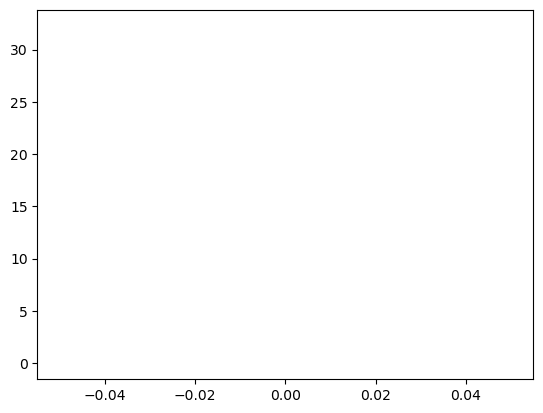

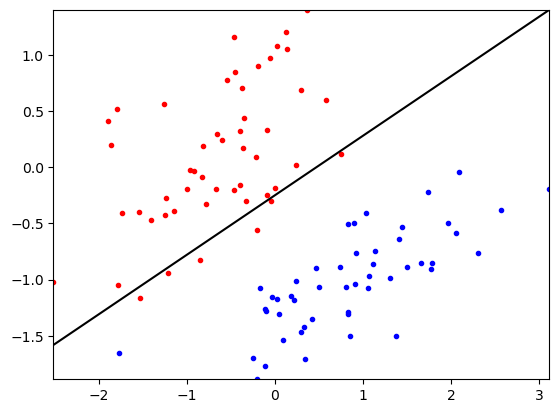

[ 0.49909735 -1.06505412  2.00821066] => 32.20785767000251 / 0.06060606060606061


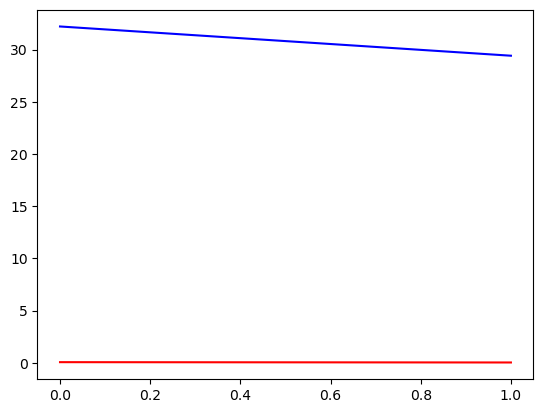

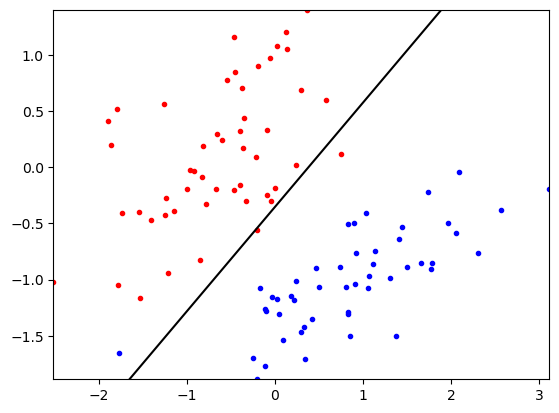

[ 0.57829393 -1.52525955  1.64060339] => 29.40796596458216 / 0.030303030303030304


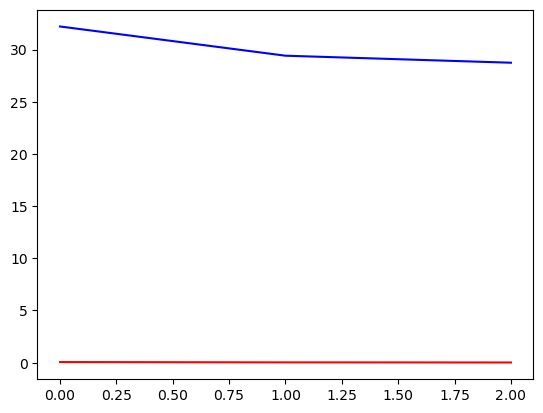

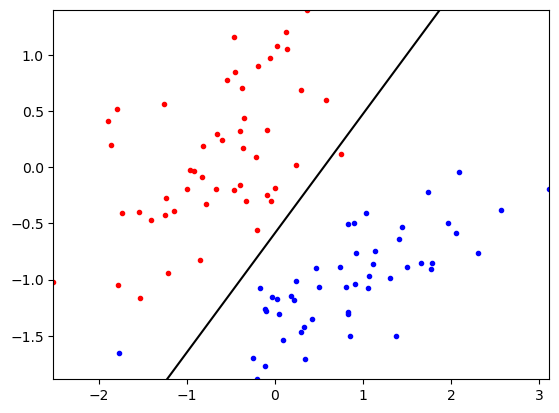

[ 0.84161432 -1.52725274  1.43735721] => 28.73610894636626 / 0.020202020202020204


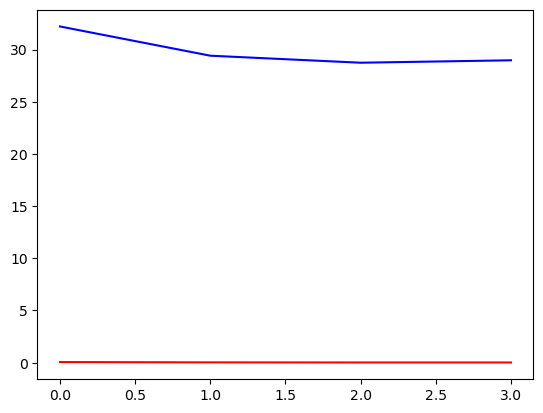

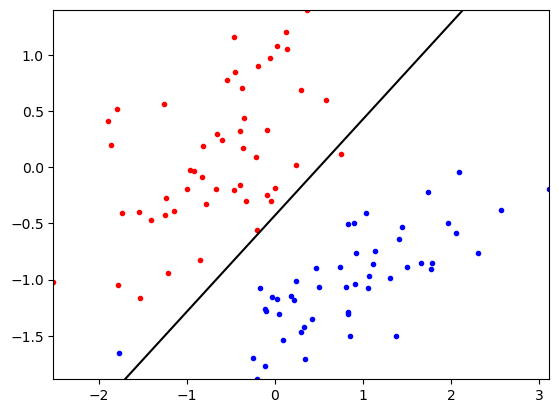

[ 0.69859896 -1.39964358  1.63235911] => 28.968637852535235 / 0.020202020202020204


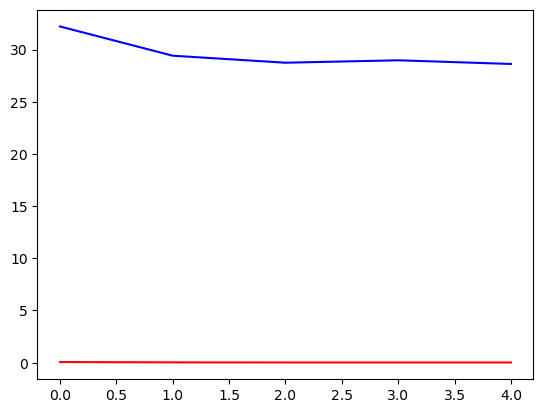

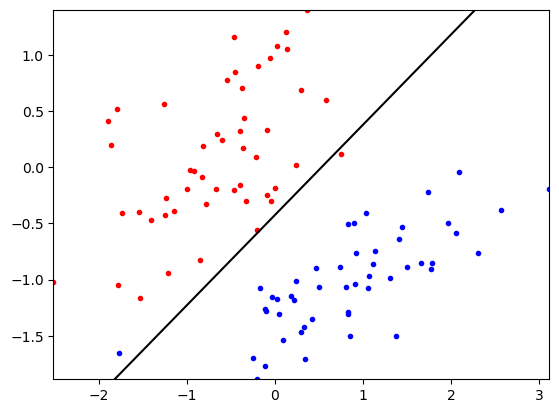

[ 0.69876795 -1.32476769  1.64722828] => 28.616450679575877 / 0.020202020202020204


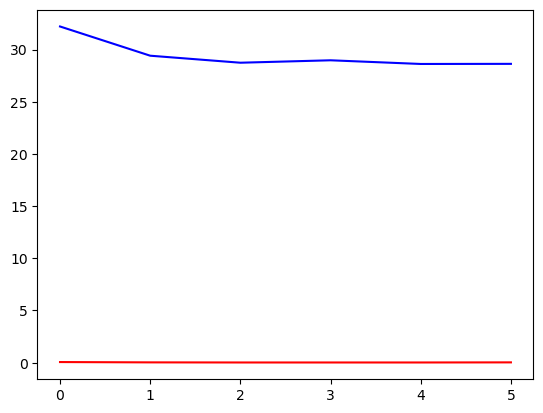

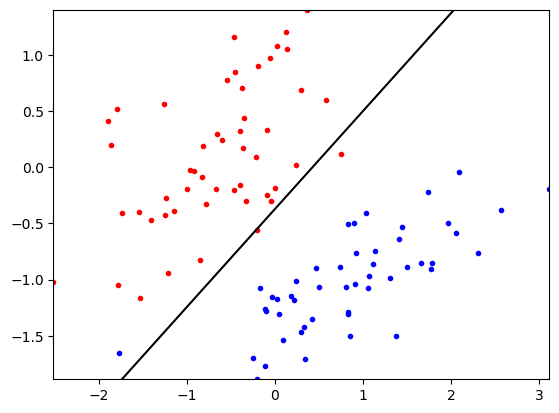

[ 0.61297159 -1.44260863  1.65232826] => 28.6270918860145 / 0.030303030303030304


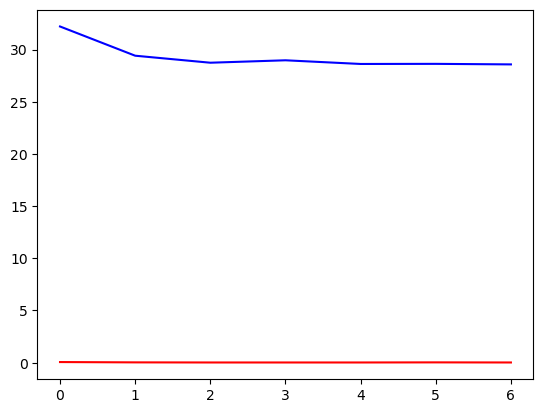

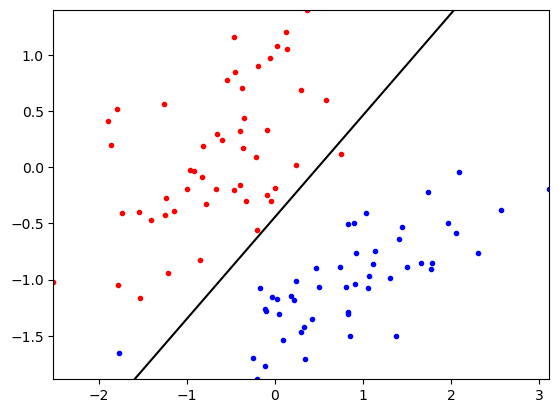

[ 0.69682664 -1.42851721  1.57511982] => 28.57513957055491 / 0.020202020202020204


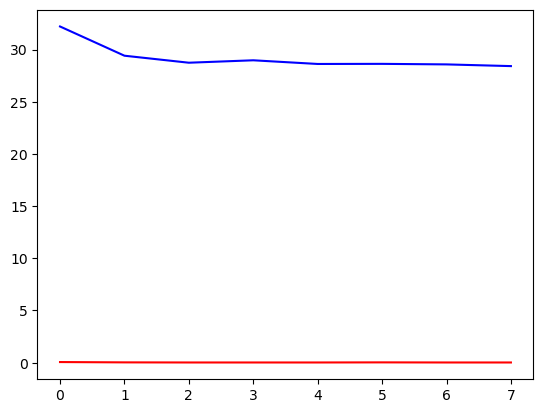

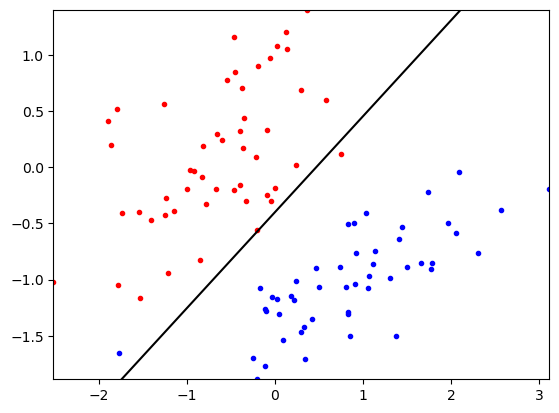

[ 0.65227123 -1.39679102  1.6335444 ] => 28.41198284421109 / 0.020202020202020204


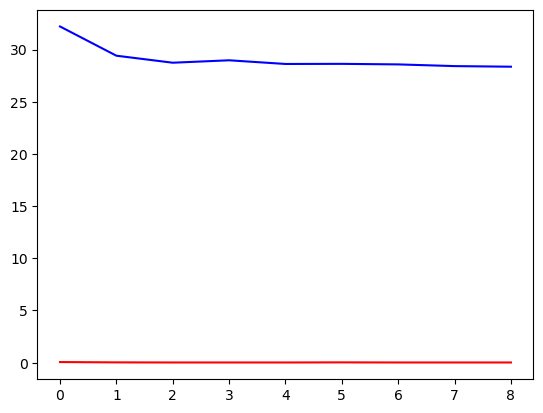

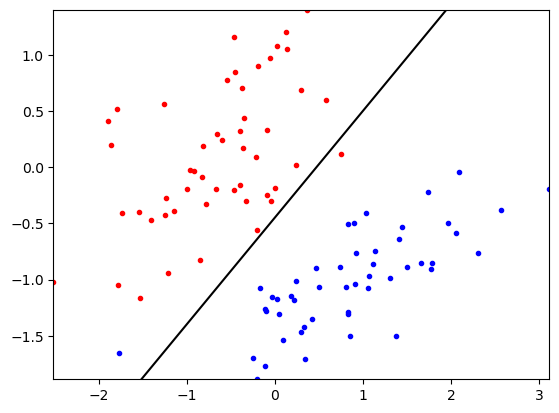

[ 0.69805605 -1.48639011  1.56346028] => 28.354098153979262 / 0.020202020202020204


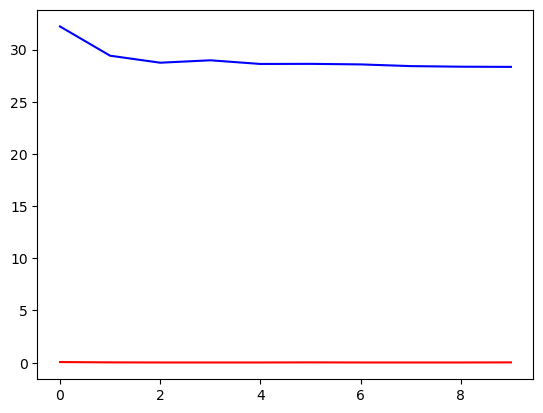

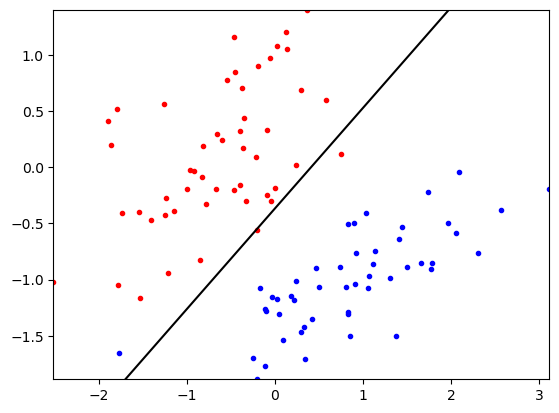

[ 0.59437268 -1.45533938  1.62377192] => 28.336520361034175 / 0.030303030303030304


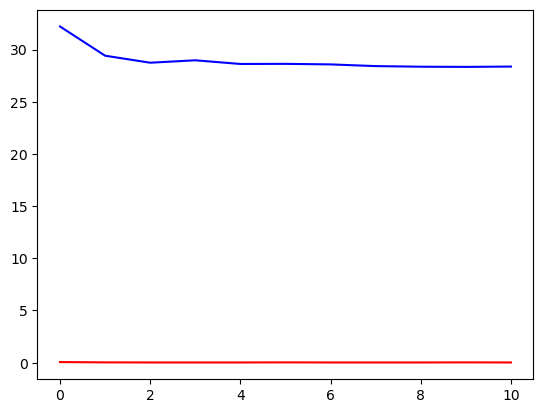

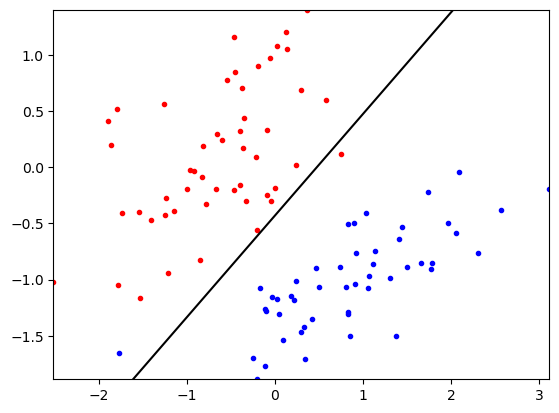

[ 0.68146954 -1.43778917  1.58759328] => 28.367623467253747 / 0.020202020202020204


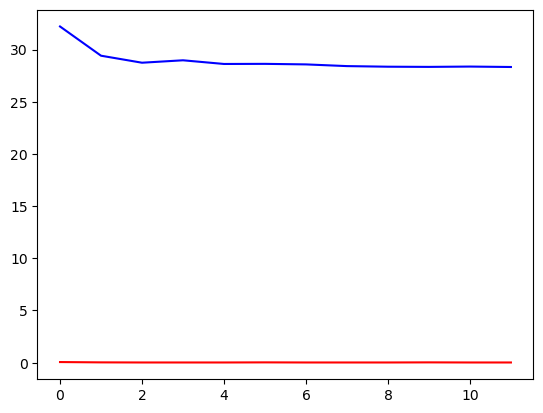

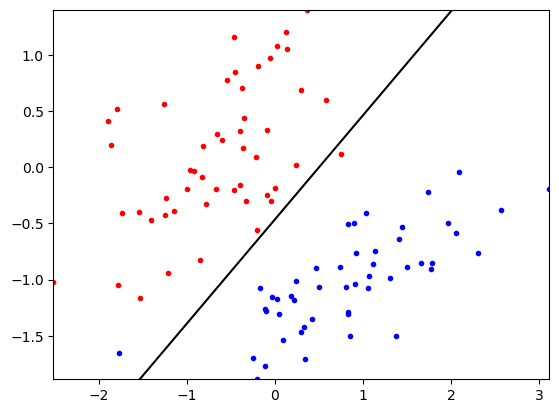

[ 0.72164542 -1.44488295  1.55713983] => 28.326312137468182 / 0.020202020202020204


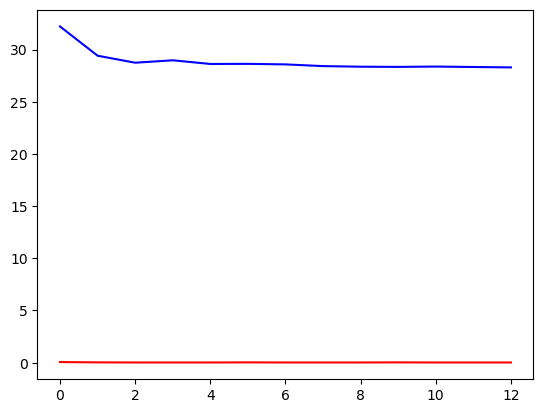

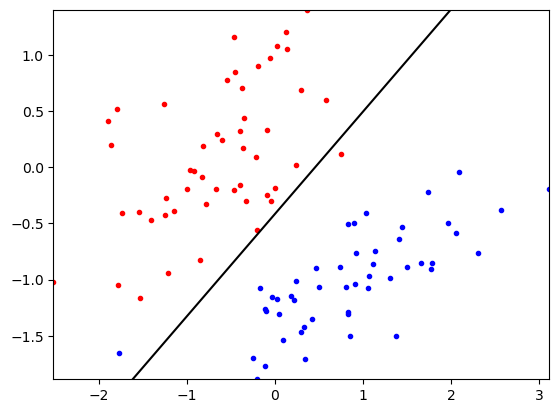

[ 0.65919251 -1.44842442  1.58834647] => 28.28692575626039 / 0.020202020202020204


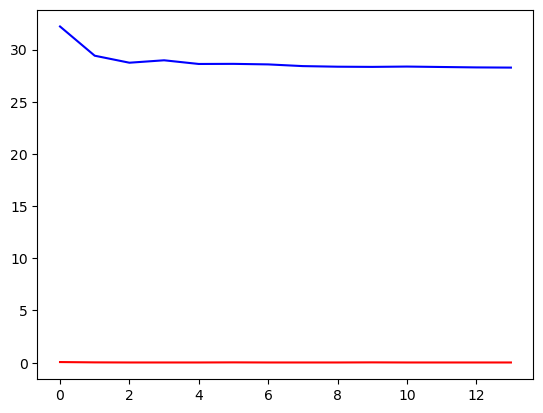

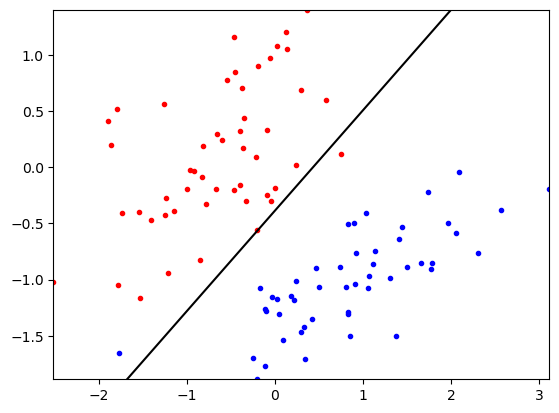

[ 0.62079534 -1.44076731  1.60991388] => 28.268648271162313 / 0.020202020202020204


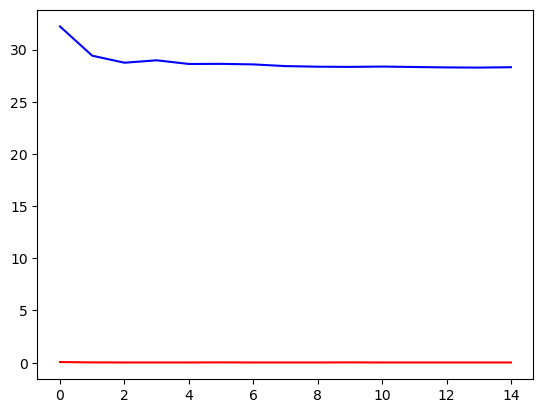

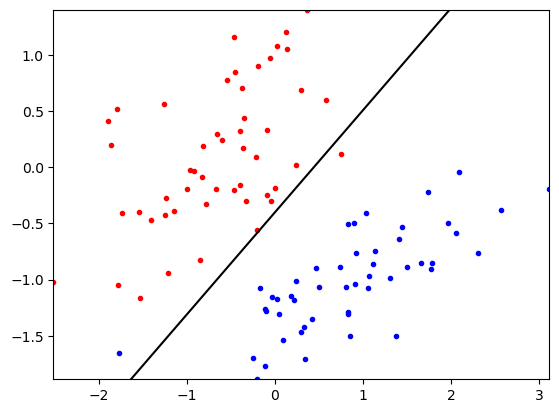

[ 0.63834413 -1.45145187  1.59494255] => 28.305516338481794 / 0.020202020202020204


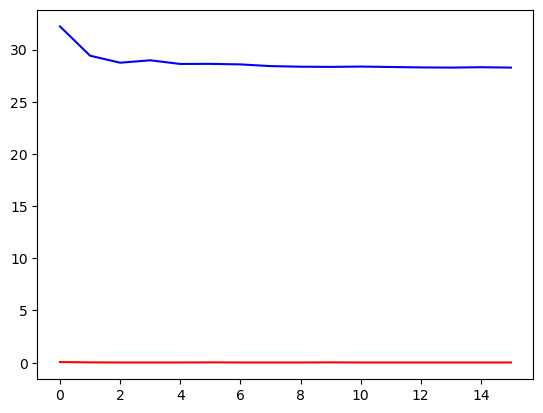

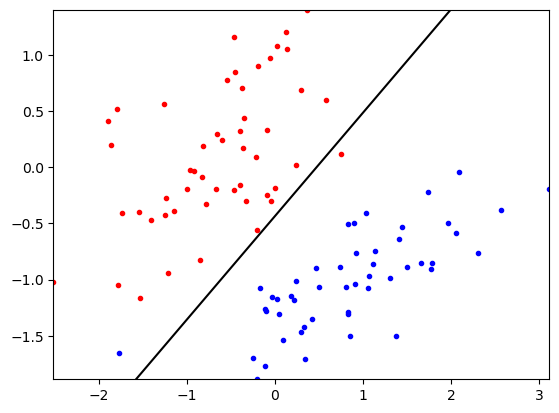

[ 0.68247666 -1.44851939  1.5714451 ] => 28.268031480347116 / 0.020202020202020204


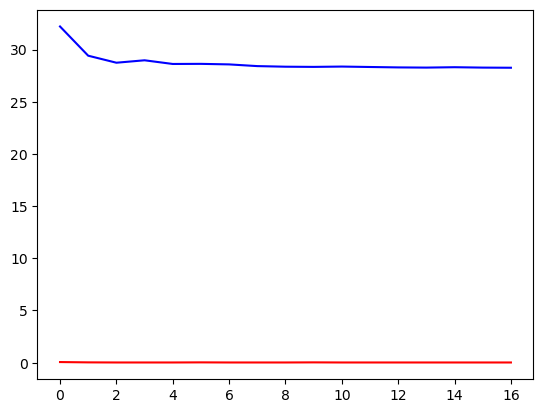

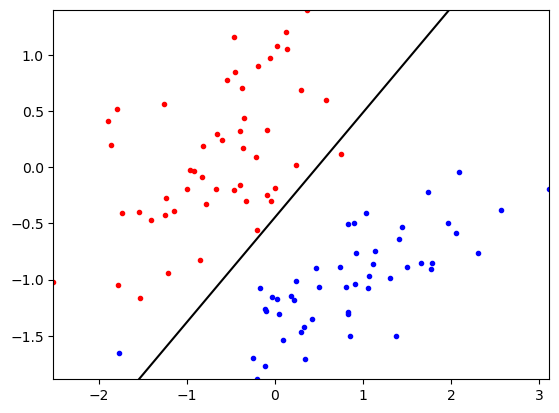

[ 0.69376447 -1.45601608  1.55853207] => 28.254716450493948 / 0.020202020202020204


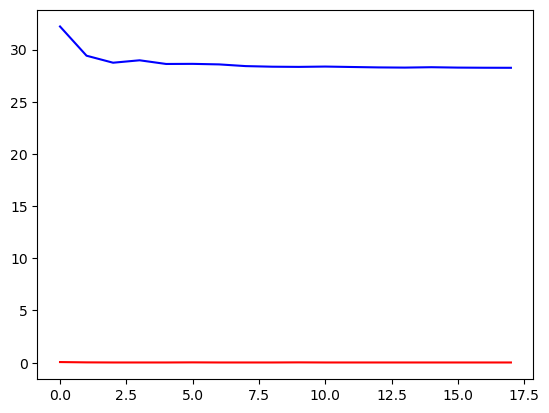

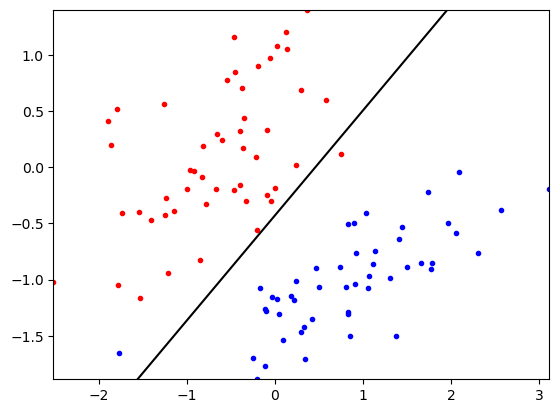

[ 0.66986963 -1.46509372  1.56546168] => 28.249483928129735 / 0.020202020202020204


In [23]:
learner = logisticClassify2();
learner.classes = np.unique(YA) 
wts = np.array([0.,-0.,0]); 
learner.theta = wts; 
(J1,J2) = learner.train_with_l2(XA,YA,2,0.5,0.01,50)
plt.show()

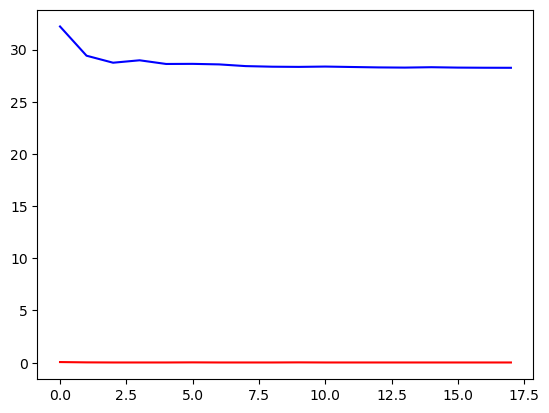

In [27]:
plt.plot(J1,"b")
plt.plot(J2,"r")

In [28]:
learner.theta

array([ 0.66986963, -1.46509372,  1.56546168])

Compared with the theta trained without regulation components:
array([ 3.49561704, -3.44760687,  5.9903019 ])
The theta trained with L1 regulation
array([ 1.36119842, -2.10605746,  2.88380247])
The absolute value of trained theta with L2 regulation is less
And it takes more iterations than trainer with L1 regulation to converge, but much less iterations than that without regulation components.
But the training error is much higher due to the model gets less "complicated" because it was "punished" by regulation components.

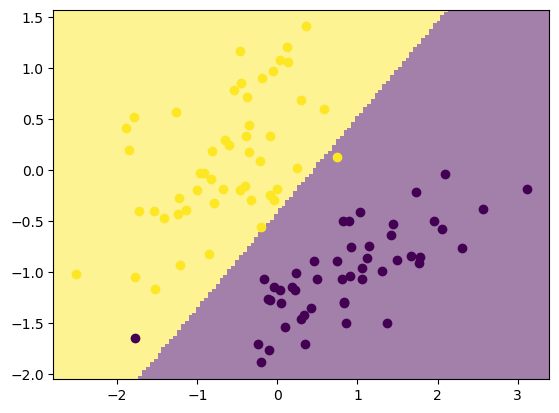

In [29]:
ml.plotClassify2D(learner, XA, YA)

The influence on the gradient is different, the derivative of L1 regulation components equals to const value and reduces to 0 when theta equals to 0, while the derivative of L2 regulation gets smaller when theta reduces. L1 regulation can lead to a sparser weights vector while L2 regulation tends to produce smaller weights.
L1 is useful when we want to select unrelated features , as it can force the weights of irrelevant features to become zero. However, since the two features in our dataset are equally important, L1 regularization is not suitable for this model.



Statement of Collaboration：  
I write my homework by myself.    
Ran Ran